In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [4]:
# parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/dvcs/"
# parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/epg/"
# parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/bkg_1g/"
# parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/bkg_2g/"
# parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/exp/"

parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v5/inb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v5/inb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v5/inb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v5/inb/exp/"

dvcsSimInb = pd.read_pickle(parent_MC + "4397.pkl")
bkgSimInb = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
pi0SimInb = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
epgExpInb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpInb = pd.read_pickle(parent_exp + "pi0.pkl")

In [5]:
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0SimInbCDFT = pi0SimInb.loc[pi0SimInb.config == 3]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[pi0ExpInb.config == 2]
dvcsSimInbCD =  dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0SimInbCD = pi0SimInb.loc[pi0SimInb.config == 2]

epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[pi0ExpInb.config == 1]
dvcsSimInbFD =  dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0SimInbFD = pi0SimInb.loc[pi0SimInb.config == 1]

In [8]:
df3 = epgExpInbCD
df1 = dvcsSimInbCD
df2 = bkgSimInbCD
df4 = pi0ExpInbCD
df5 = pi0SimInbCD
contInbCD = len(df4)/len(df5) * len(df2)/len(df3)

coneAngle 22.590563230959145
reconGam 0.2641733796635991
coplanarity 1.6996817015160395
ME_epg 0.012621406323667242
MM2_epg -0.0010437122376412292
MM2_eg 0.9036906751313689
MM2_ep -0.01263825133183983
MPt 0.03943665008432186


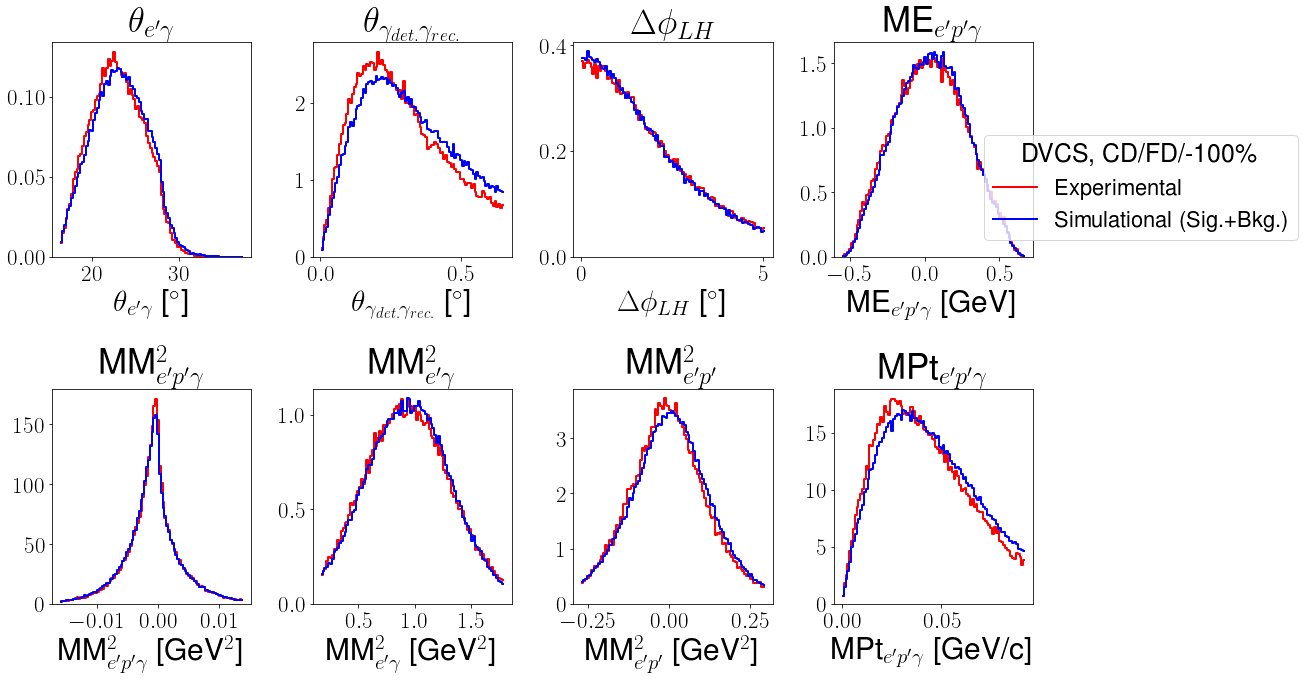

<Figure size 648x288 with 0 Axes>

In [645]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{LH}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
        simDist = (1-contInbCD)*simDist_dvcs + contInbCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='r', linewidth=2, label = 'Experimental')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=2, label = 'Simulational (Sig.+Bkg.)')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
#             axs[yind, xind].step(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='r', density=True, linewidth=2)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='r', linewidth=2)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=2)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CDFT/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_ylim(bottom = 0)
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.23, 0.8), title = "DVCS, CD/FD/-100\%")
plt.show()
plt.clf()

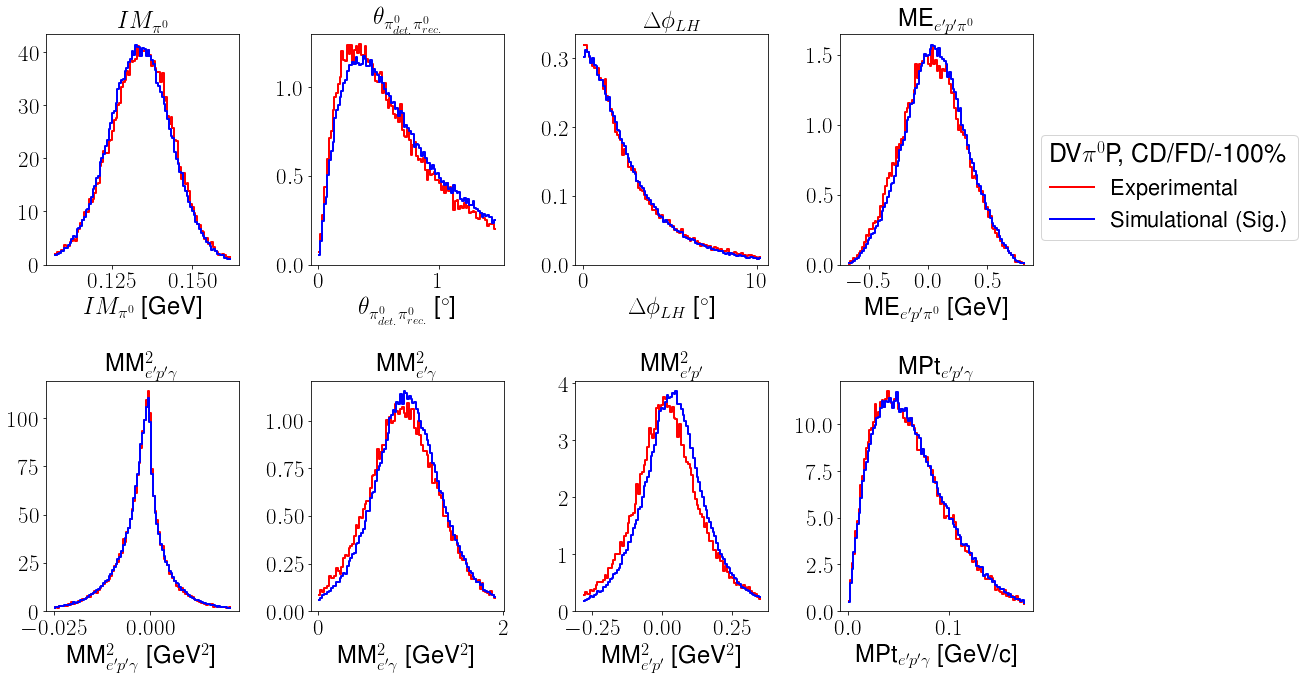

<Figure size 432x288 with 0 Axes>

In [13]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi_{LH}$" , "ME"+r"${}_{e'p'\pi^0}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(pi0SimInbCD[varstoplot[ind]], bins, density = True)
        expDist, bins = np.histogram(pi0ExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='r', linewidth=2, label = 'Experimental')           
            axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='b', linewidth=2, label = 'Simulational (Sig.)')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
#             axs[yind, xind].step(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='r', density=True, linewidth=2)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='r', linewidth=2)
            axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='b', linewidth=2)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_ylim(bottom = 0)
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.23, 0.8), title = "DV"+r"$\pi^0$"+"P, CD/FD/-100\%")
plt.show()
plt.clf()

In [18]:
df_gammaRec = pd.concat([epgExpInbCD, epgExpInbFD])

In [19]:
ang = -np.radians((df_gammaRec.loc[df_gammaRec.Gsector<7, "Gsector"]-1) * 60)
GcX_rot = df_gammaRec.loc[df_gammaRec.Gsector<7, "GcY"] * np.sin(ang) + df_gammaRec.loc[df_gammaRec.Gsector<7, "GcX"] * np.cos(ang)
GcY_rot = df_gammaRec.loc[df_gammaRec.Gsector<7, "GcY"] * np.cos(ang) - df_gammaRec.loc[df_gammaRec.Gsector<7, "GcX"] * np.sin(ang)


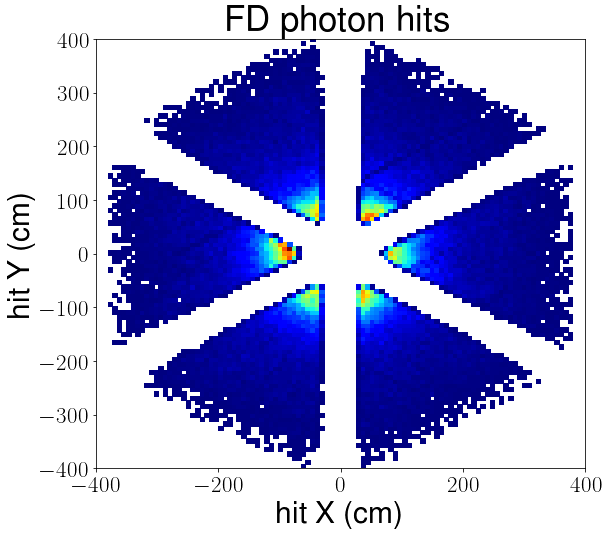

In [31]:
plt.rcParams["figure.figsize"] = (9, 8)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
plt.hist2d(GcX_rot, GcY_rot, bins = 101, cmin = 1, cmap = cmap)
plt.xlabel("hit X (cm)")
plt.ylabel("hit Y (cm)")
plt.title("FD photon hits")
plt.xlim([-400, 400])
plt.ylim([-400, 400])
plt.show()

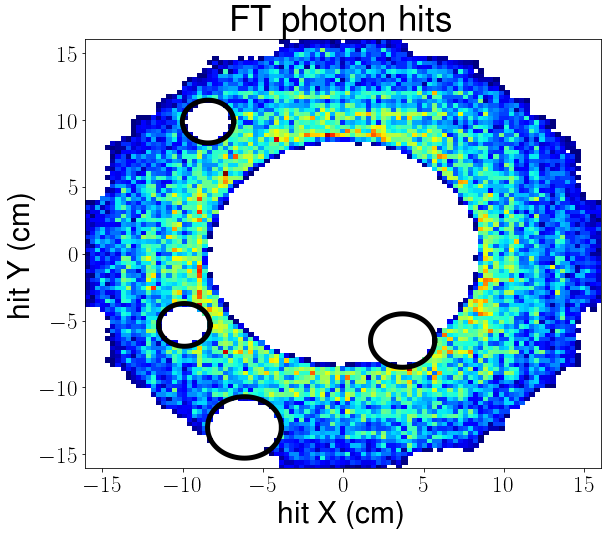

In [33]:
plt.rcParams["figure.figsize"] = (9, 8)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
plt.hist2d(epgExpInbCDFT.GcX, epgExpInbCDFT.GcY, bins = 101, cmin = 1, cmap = cmap)
plt.xlabel("hit X (cm)")
plt.ylabel("hit Y (cm)")
plt.title("FT photon hits")

theta = np.linspace(0, 2*np.pi, 101)
circleCenterX1 = -8.419
circleCenterY1 = 9.889
circleRadius1 = 1.6

circleCenterX2 = -9.89
circleCenterY2 = -5.327
circleRadius2 = 1.6

circleCenterX3 = -6.15
circleCenterY3 = -13
circleRadius3 = 2.3
        
circleCenterX4 = 3.7
circleCenterY4 = -6.5
circleRadius4 = 2

plt.plot(circleRadius1*np.cos(theta) + circleCenterX1, circleRadius1*np.sin(theta) + circleCenterY1, color = 'k', linewidth = 5)
plt.plot(circleRadius2*np.cos(theta) + circleCenterX2, circleRadius2*np.sin(theta) + circleCenterY2, color = 'k', linewidth = 5)
plt.plot(circleRadius3*np.cos(theta) + circleCenterX3, circleRadius3*np.sin(theta) + circleCenterY3, color = 'k', linewidth = 5)
plt.plot(circleRadius4*np.cos(theta) + circleCenterX4, circleRadius4*np.sin(theta) + circleCenterY4, color = 'k', linewidth = 5)

# plt.xlim([-400, 400])
# plt.ylim([-400, 400])
plt.show()

0.10466059004080128


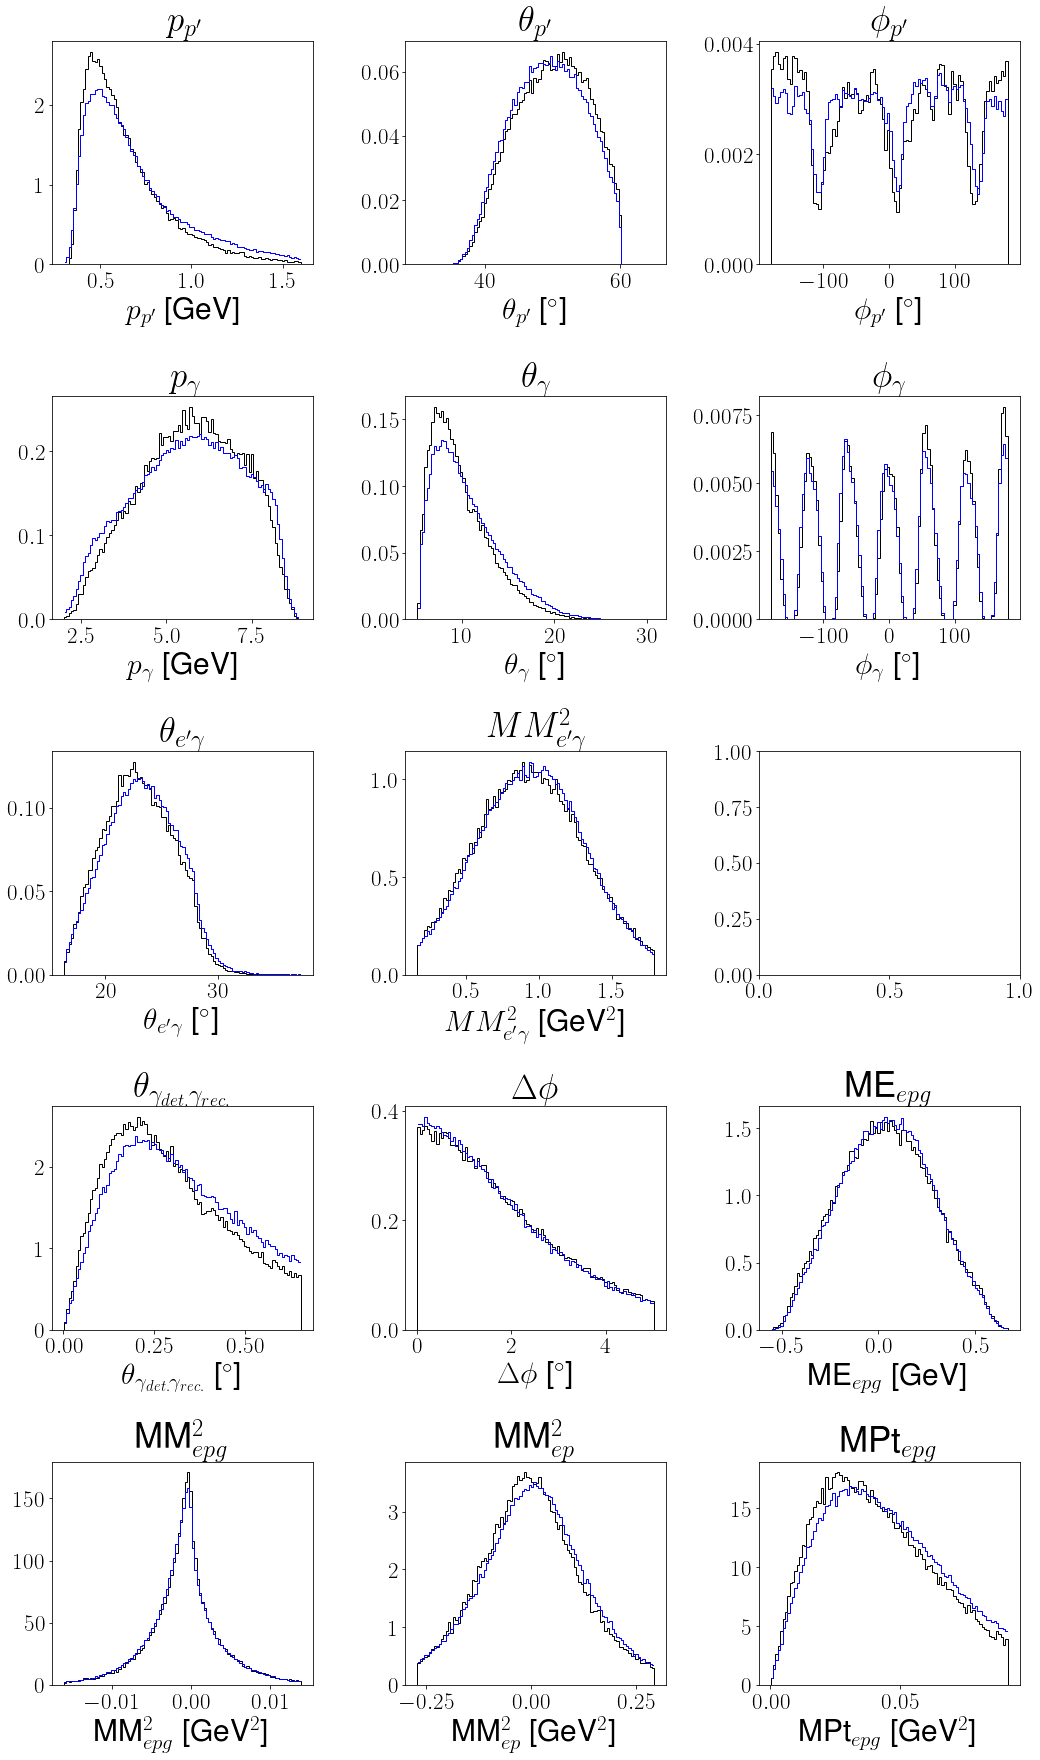

In [35]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = epgExpInbCD
df1 = dvcsSimInbCD
df2 = bkgSimInbCD
df4 = pi0ExpInbCD
df5 = pi0SimInbCD

# df1 = df1[df1.Gp>3]
# df2 = df2[df2.Gp>3]
# df3 = df3[df3.Gp>3]
# df4 = df4[df4.Gp>3]
# df5 = df5[df5.Gp>3]

# df1 = df1[df1.Pp<0.8]
# df2 = df2[df2.Pp<0.8]
# df3 = df3[df3.Pp<0.8]
# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]


contInb = len(df4)/len(df5) * len(df2)/len(df3)
contInbCD = contInb
print(contInb)
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            bins= np.linspace(30, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbCD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbCD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbCD{}_{:.3f}.pdf".format(i, sigma2))
plt.show()


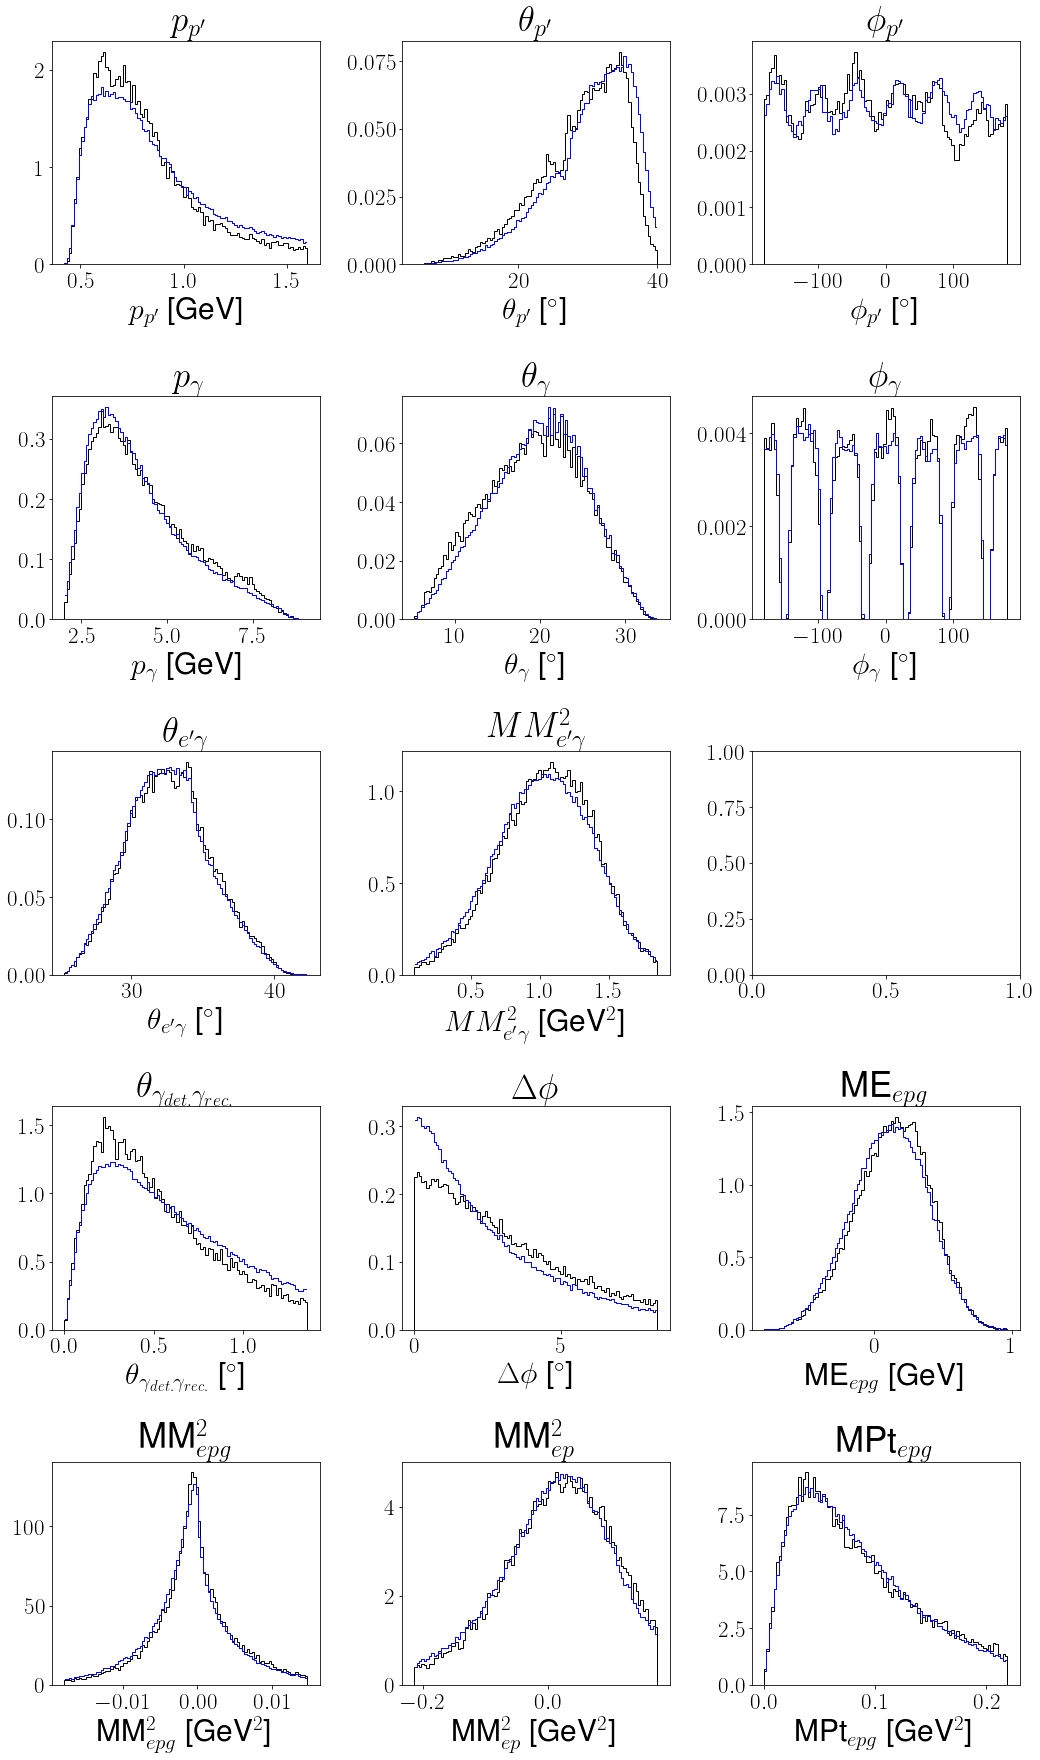

In [34]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = epgExpInbFD
df1 = dvcsSimInbFD
df2 = bkgSimInbFD
df4 = pi0ExpInbFD
df5 = pi0SimInbFD

# df1 = df1[df1.Pp<0.8]
# df2 = df2[df2.Pp<0.8]
# df3 = df3[df3.Pp<0.8]
# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]

contInb = len(df4)/len(df5) * len(df2)/len(df3)
contInbFD = contInb
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            bins= np.linspace(5, 40, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbFD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbFD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbFD{}_{:.3f}.pdf".format(i, sigma2))
plt.show()


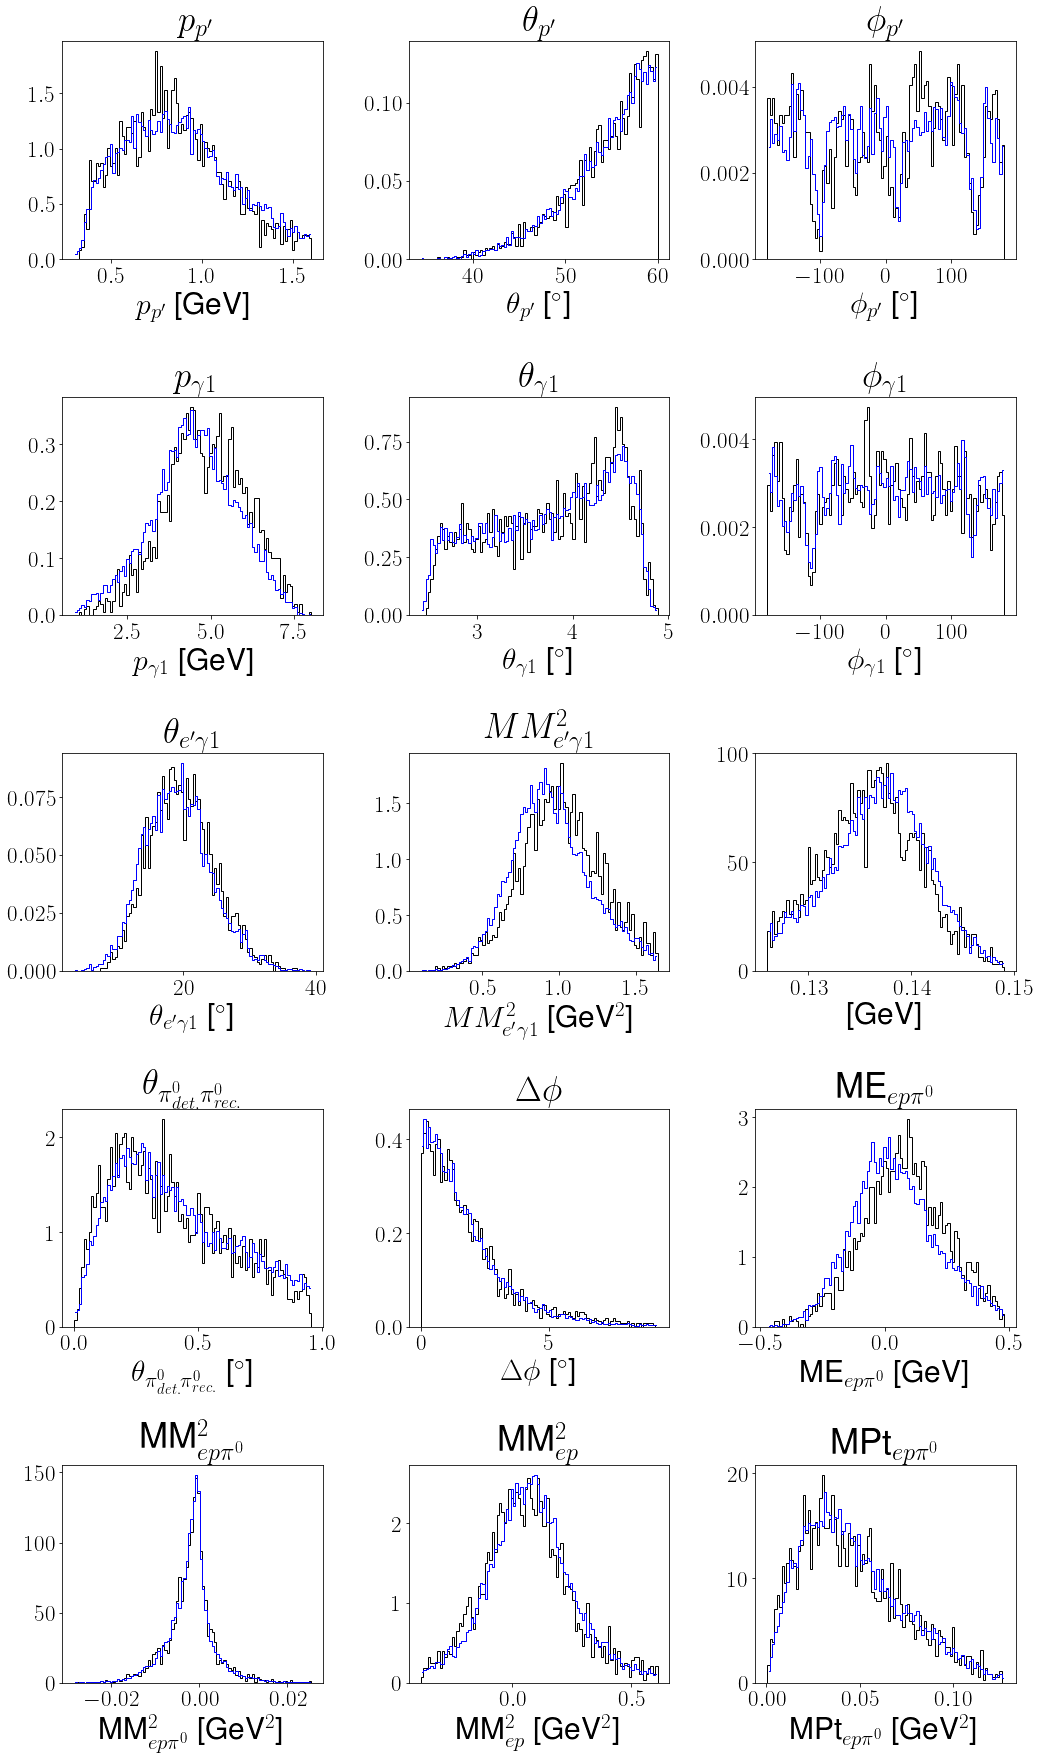

<Figure size 648x576 with 0 Axes>

In [36]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\gamma 1}$", "", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

df4 = pi0ExpInbCDFT
df5 = pi0SimInbCDFT

# df1 = df1[df1.Gp>3]
# df2 = df2[df2.Gp>3]
# df3 = df3[df3.Gp>3]
# df4 = df4[df4.Gp>3]
# df5 = df5[df5.Gp>3]

# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]


fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()

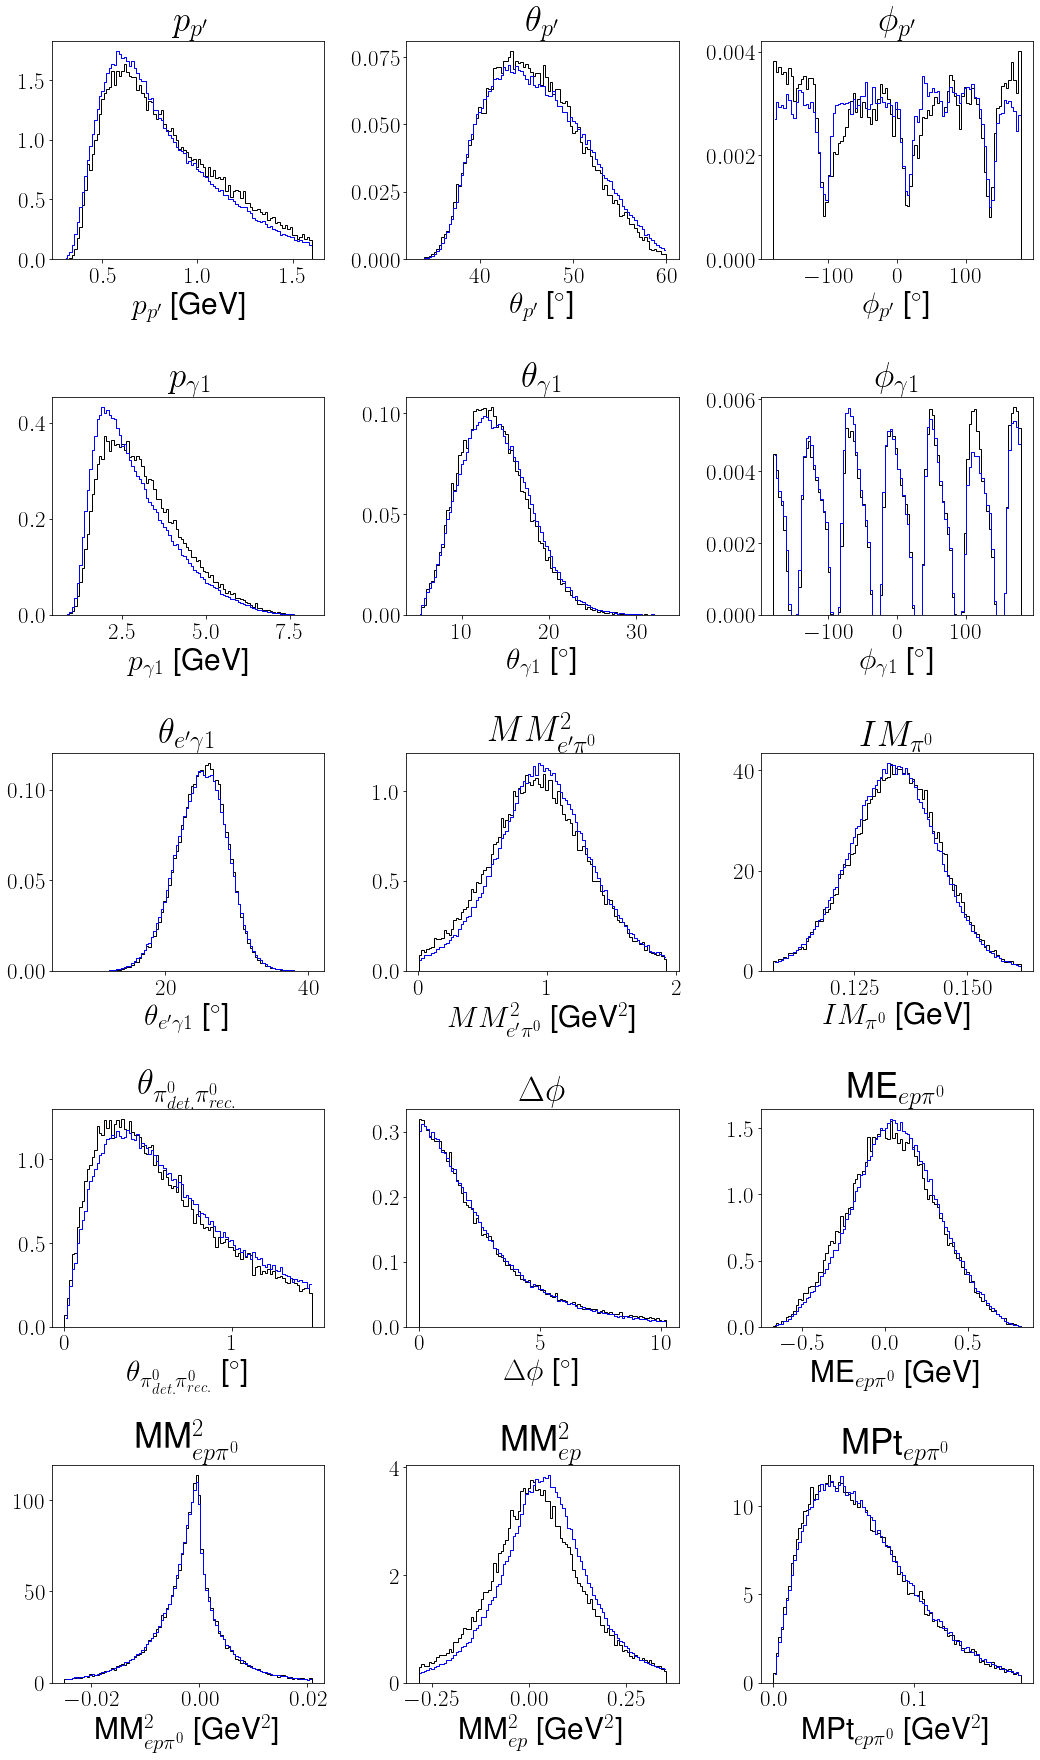

<Figure size 648x576 with 0 Axes>

In [37]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\pi^0}$", r"$IM_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

df4 = pi0ExpInbCD
df5 = pi0SimInbCD

# df1 = df1[df1.Gp>3]
# df2 = df2[df2.Gp>3]
# df3 = df3[df3.Gp>3]
# df4 = df4[df4.Gp2<2]
# df5 = df5[df5.Gp2<2]

# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]


fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()

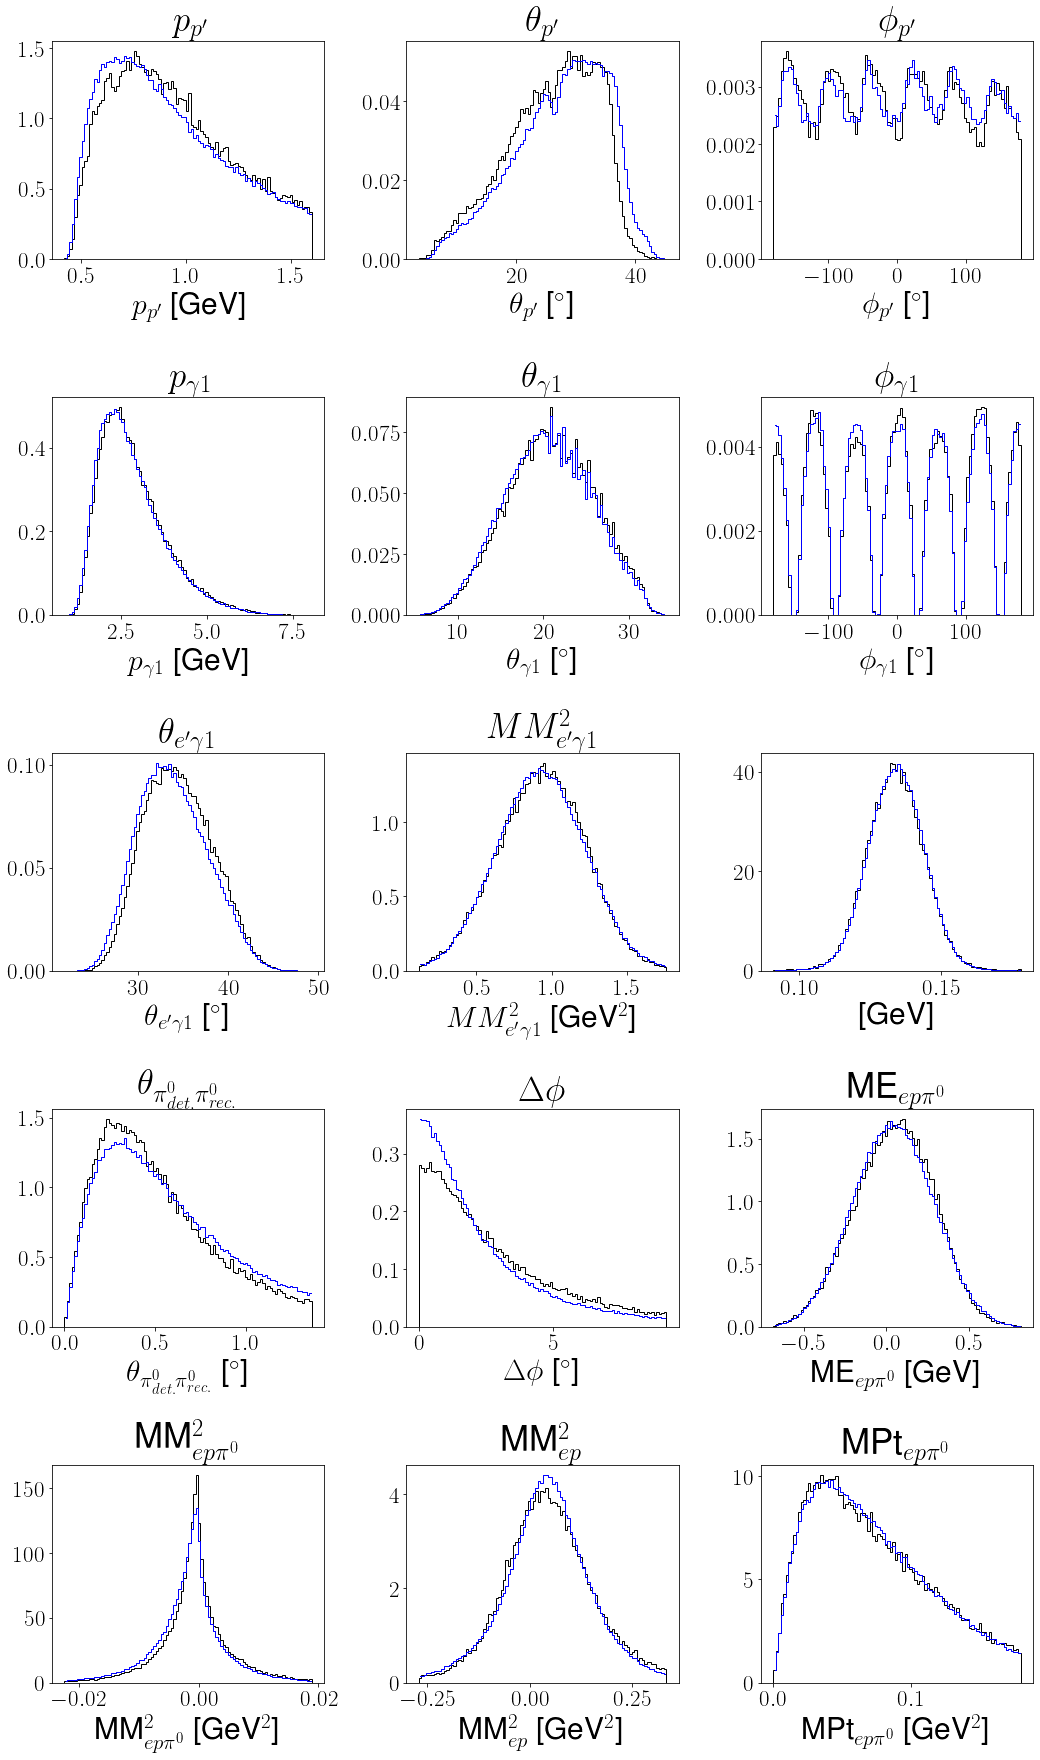

<Figure size 648x576 with 0 Axes>

In [38]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\gamma 1}$", "", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

df4 = pi0ExpInbFD
df5 = pi0SimInbFD

# df1 = df1[df1.Gp>3]
# df2 = df2[df2.Gp>3]
# df3 = df3[df3.Gp>3]
# df4 = df4[df4.Gp2>2]
# df5 = df5[df5.Gp2>2]

# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]

fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()

In [39]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v5/outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v5/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v5/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v5/outb/exp/"


dvcsSimOutb = pd.read_pickle(parent_MC + "4398.pkl")
bkgSimOutb = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
pi0SimOutb = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")
epgExpOutb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpOutb = pd.read_pickle(parent_exp + "pi0.pkl")

In [41]:
epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[pi0ExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0SimOutbCDFT = pi0SimOutb.loc[pi0SimOutb.config == 3]

epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
pi0ExpOutbCD = pi0ExpOutb.loc[pi0ExpOutb.config == 2]
dvcsSimOutbCD =  dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]
pi0SimOutbCD = pi0SimOutb.loc[pi0SimOutb.config == 2]

epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]
pi0ExpOutbFD = pi0ExpOutb.loc[pi0ExpOutb.config == 1]
dvcsSimOutbFD =  dvcsSimOutb.loc[dvcsSimOutb.config == 1]
bkgSimOutbFD = bkgSimOutb.loc[bkgSimOutb.config == 1]
pi0SimOutbFD = pi0SimOutb.loc[pi0SimOutb.config == 1]

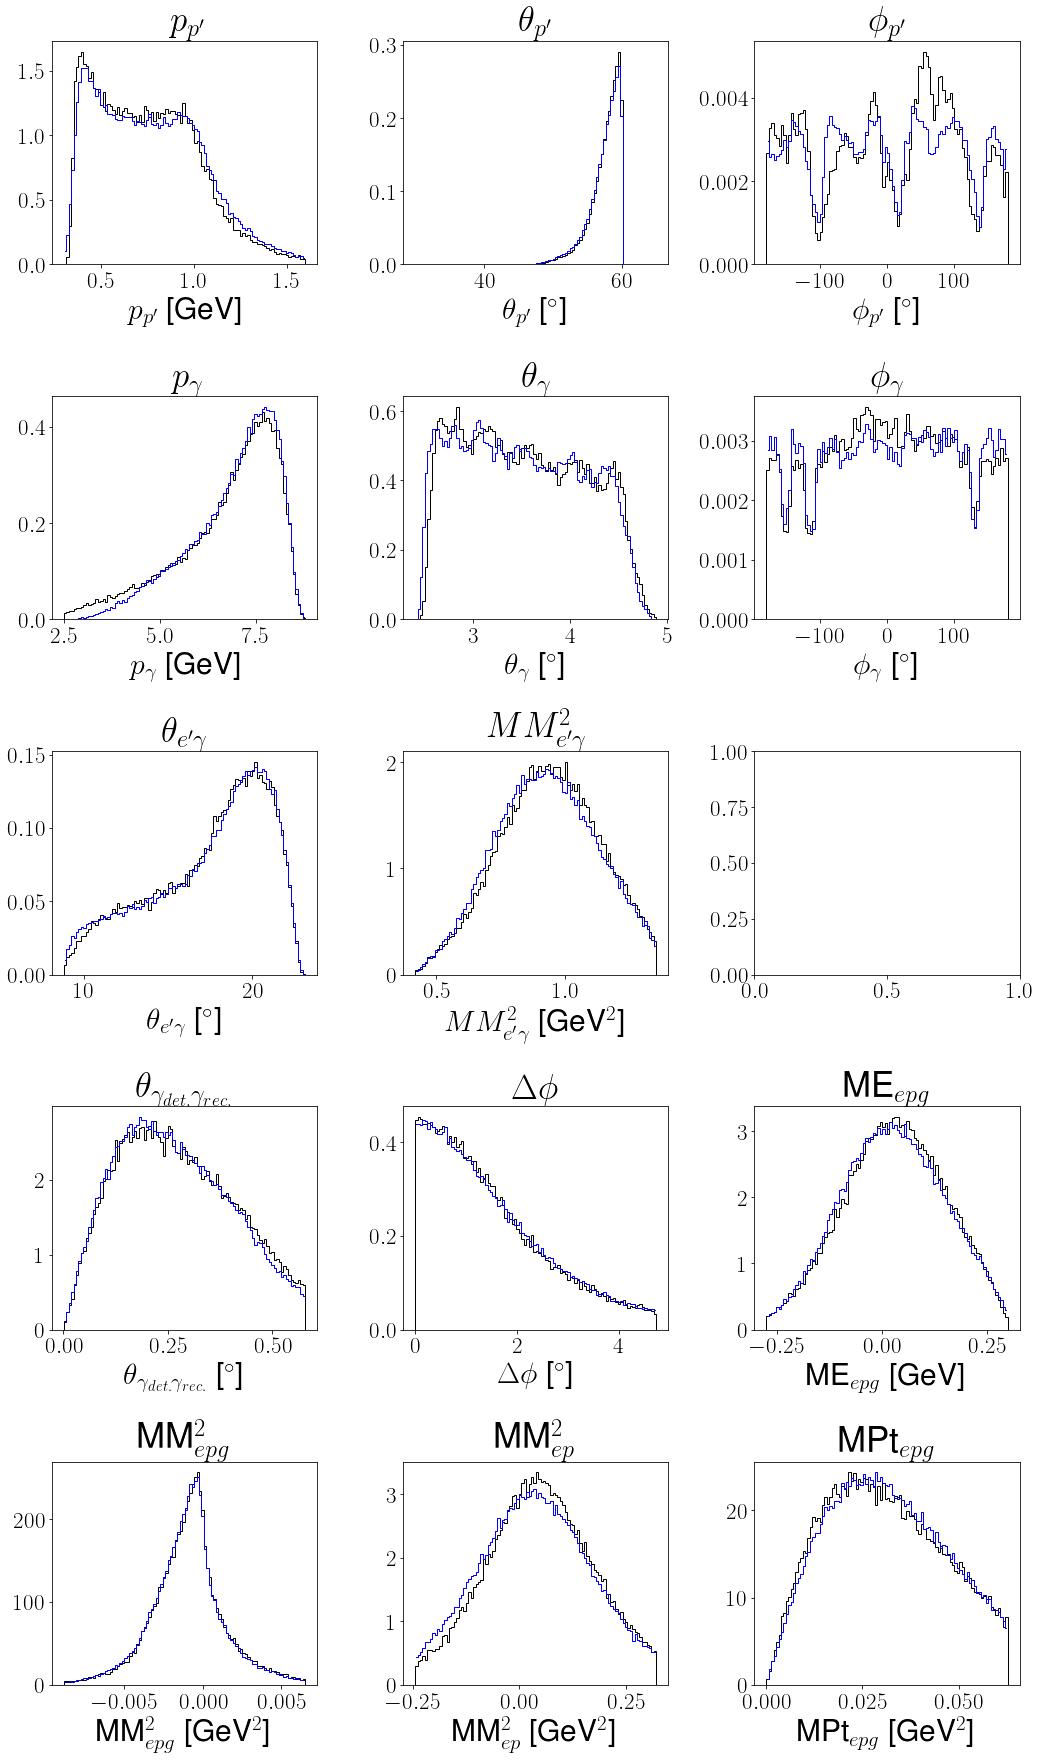

In [42]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = epgExpOutbCDFT
df1 = dvcsSimOutbCDFT
df2 = bkgSimOutbCDFT
df4 = pi0ExpOutbCDFT
df5 = pi0SimOutbCDFT
contOutb = len(df4)/len(df5) * len(df2)/len(df3)
contOutbCDFT = contOutb
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            bins= np.linspace(30, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contOutb)*simDist_dvcs + contOutb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}.pdf".format(i, sigma2))
plt.show()


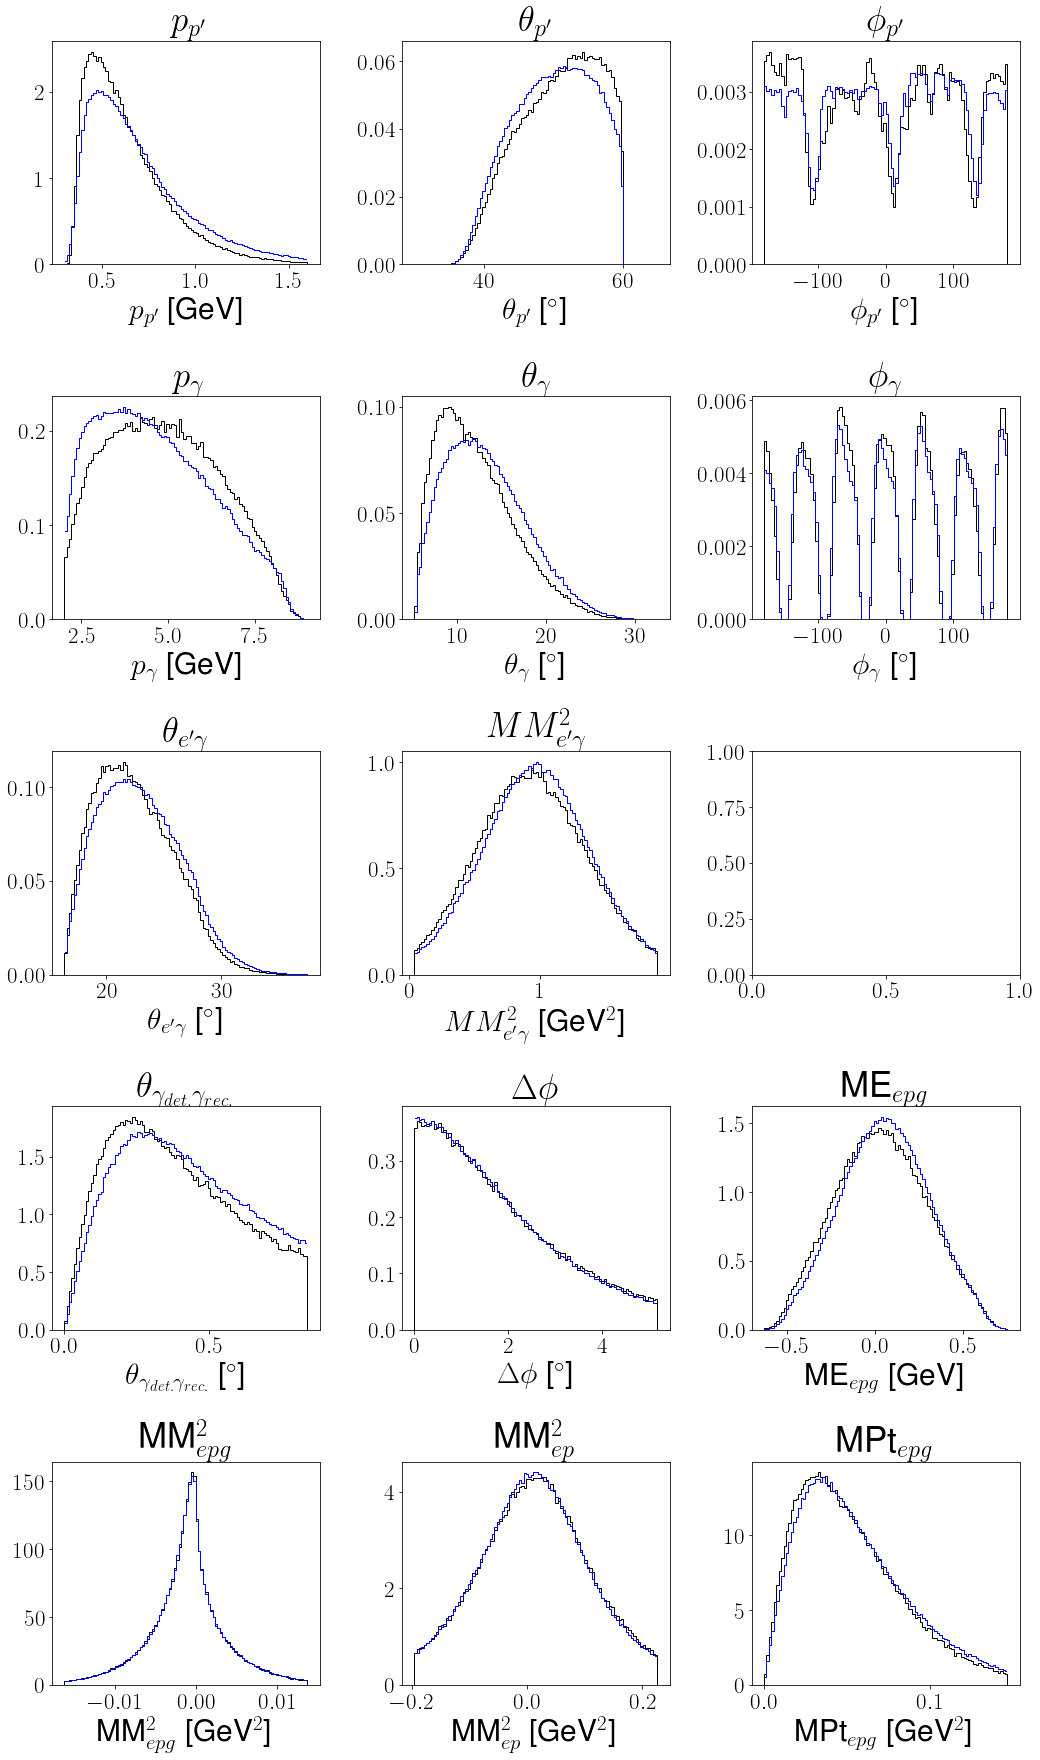

In [43]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = epgExpOutbCD
df1 = dvcsSimOutbCD
df2 = bkgSimOutbCD
df4 = pi0ExpOutbCD
df5 = pi0SimOutbCD

# df1 = df1[df1.Gp>3]
# df2 = df2[df2.Gp>3]
# df3 = df3[df3.Gp>3]
# df4 = df4[df4.Gp>3]
# df5 = df5[df5.Gp>3]

# df1 = df1[df1.Pp<0.8]
# df2 = df2[df2.Pp<0.8]
# df3 = df3[df3.Pp<0.8]
# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]
contOutb = len(df4)/len(df5) * len(df2)/len(df3)
contOutbCD = contOutb
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            bins= np.linspace(30, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contOutb)*simDist_dvcs + contOutb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"OutbCD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"OutbCD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"OutbCD{}_{:.3f}.pdf".format(i, sigma2))
plt.show()


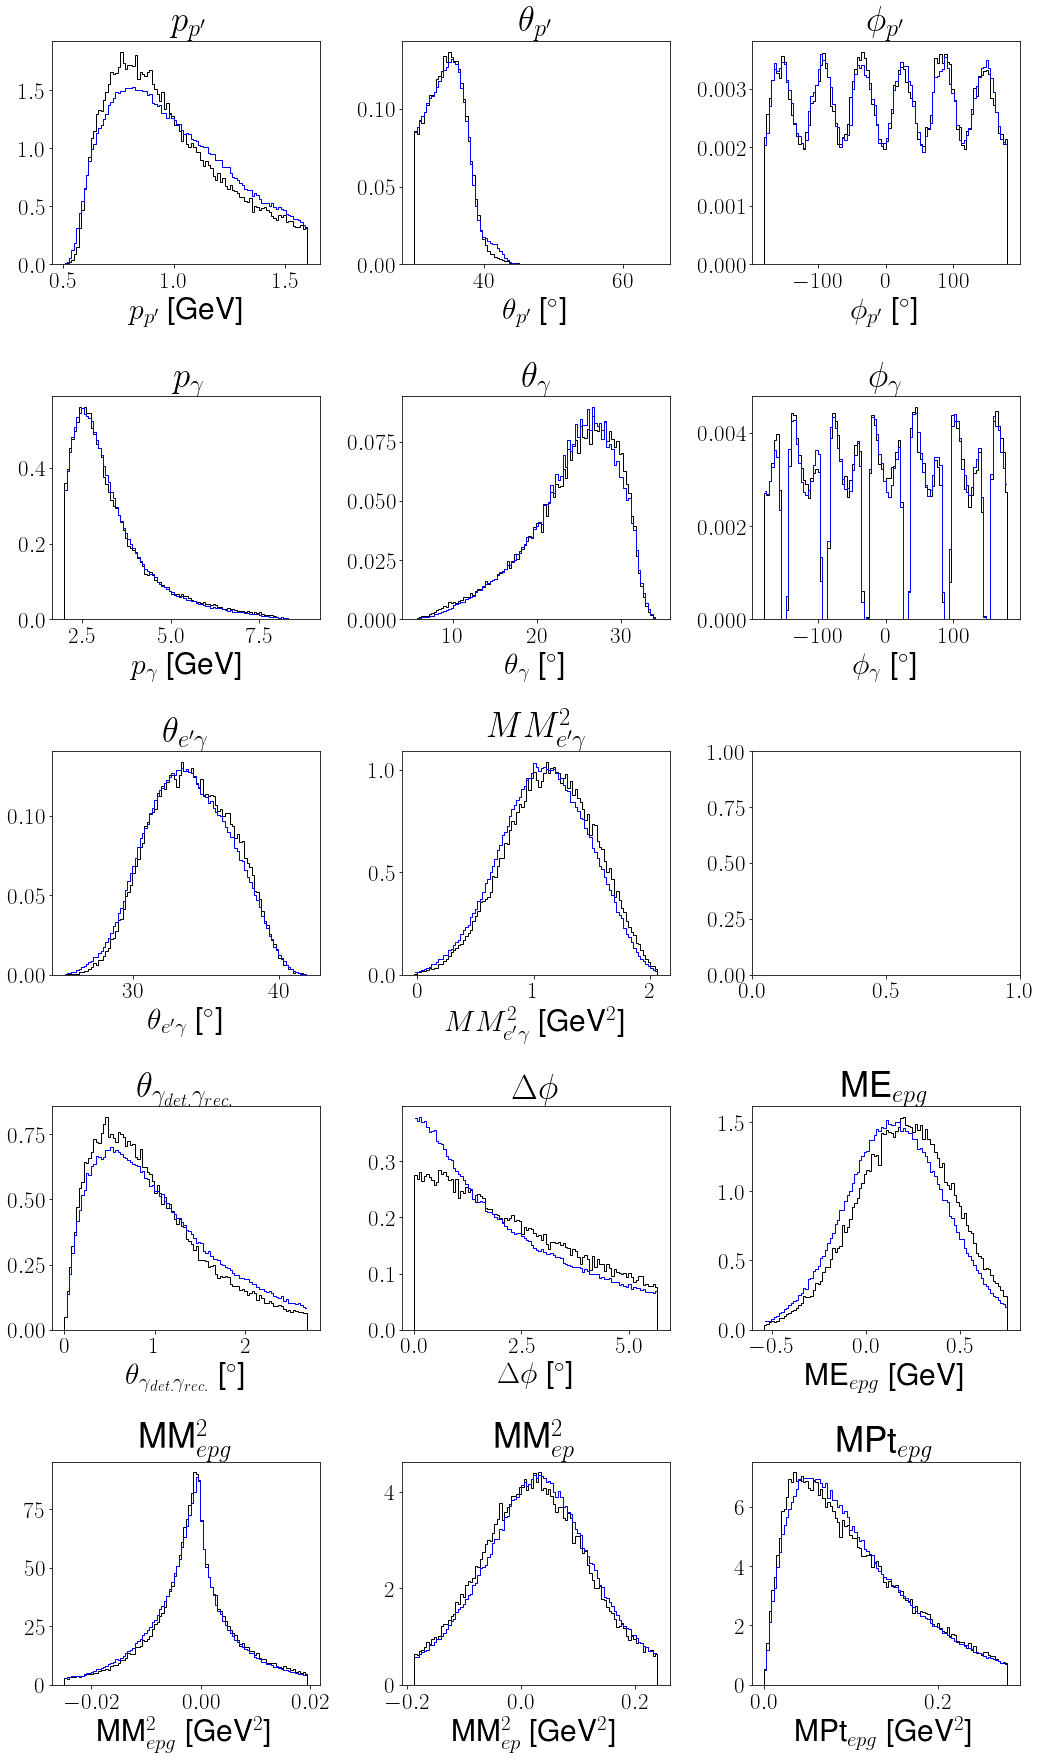

In [44]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = epgExpOutbFD
df1 = dvcsSimOutbFD
df2 = bkgSimOutbFD
df4 = pi0ExpOutbFD
df5 = pi0SimOutbFD

# df1 = df1.loc[df1.Gp>2]
# df2 = df2.loc[df2.Gp>2]
# df3 = df3.loc[df3.Gp>2]
# df4 = df4.loc[df4.Gp>2]
# df5 = df5.loc[df5.Gp>2]
contOutb = len(df4)/len(df5) * len(df2)/len(df3)
contOutbFD = contOutb
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            bins= np.linspace(30, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contOutb)*simDist_dvcs + contOutb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        expDist, _ = np.histogram(df3[varstoplot[ind]], bins = bins)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
#         if ind == 11:
#             axs[yind, xind].axvline(0.2)
#             axs[yind, xind].axvline(0.12)
#             print(bincenters[np.argmax(simDist)] - bincenters[np.argmax(expDist)])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"OutbFD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"OutbFD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"OutbFD{}_{:.3f}.pdf".format(i, sigma2))
plt.show()


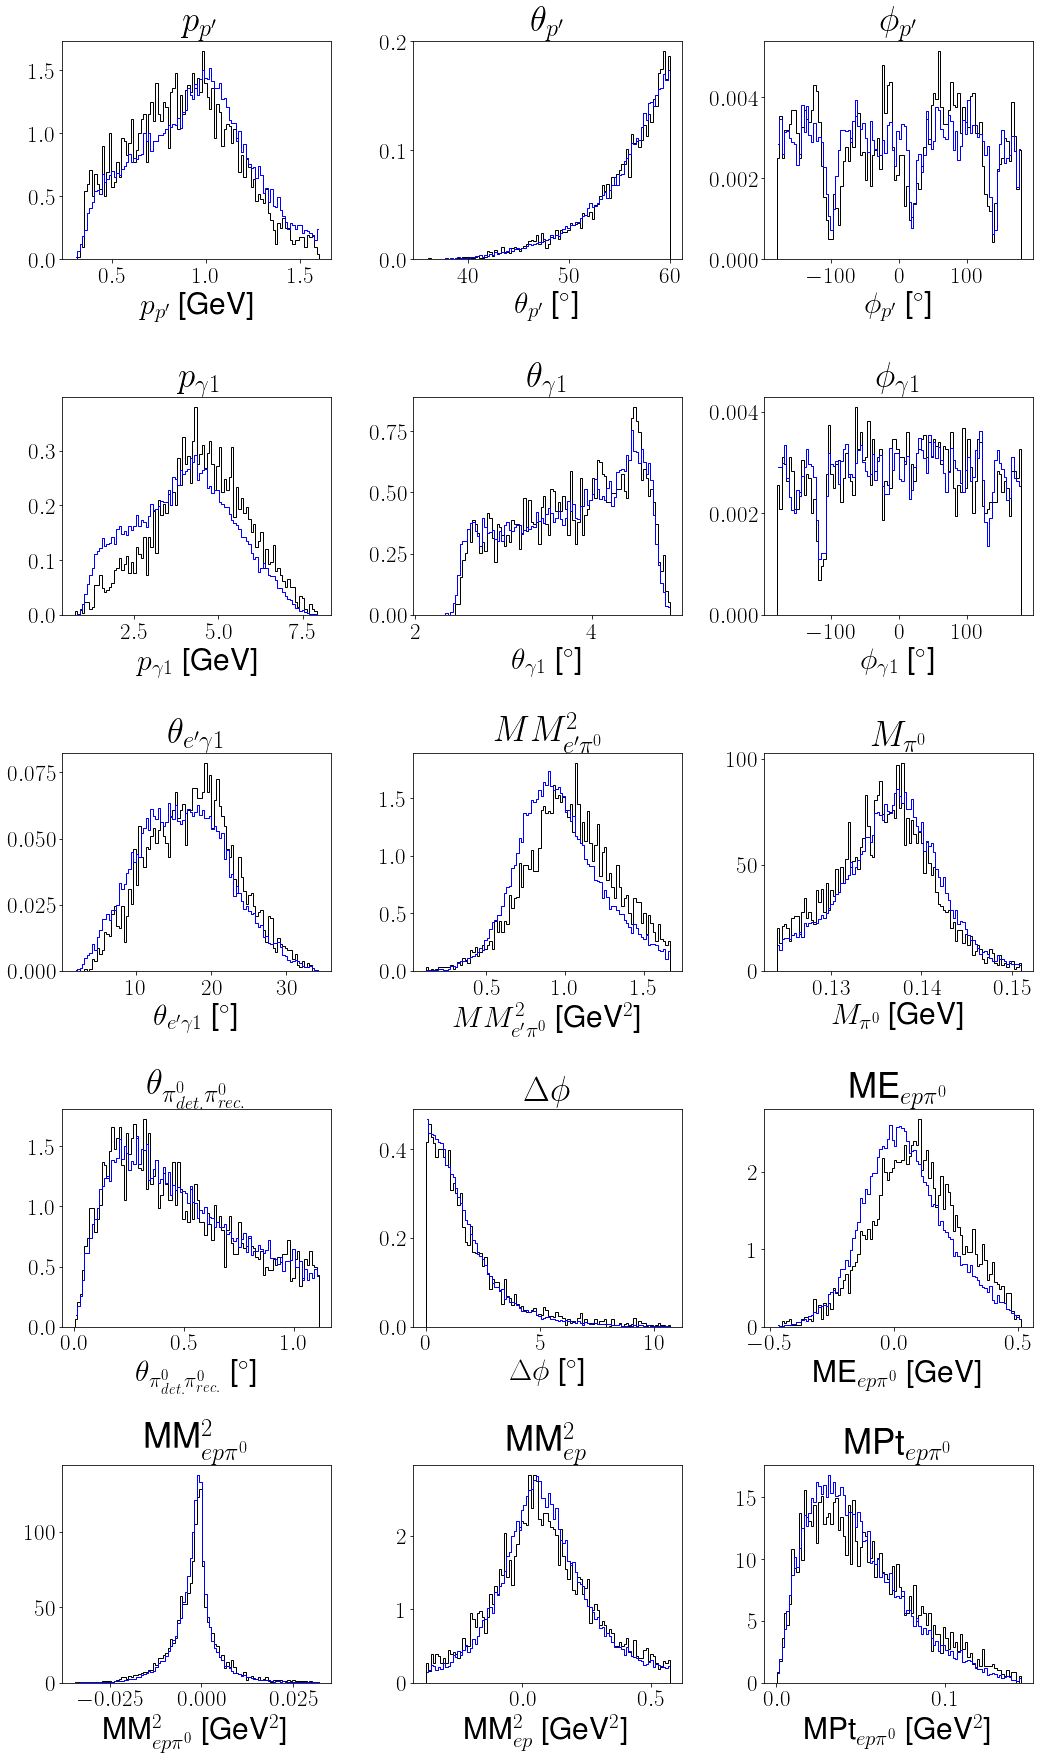

<Figure size 648x576 with 0 Axes>

In [45]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\pi^0}$", r"$M_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(pi0SimOutbCDFT[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(pi0ExpOutbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()

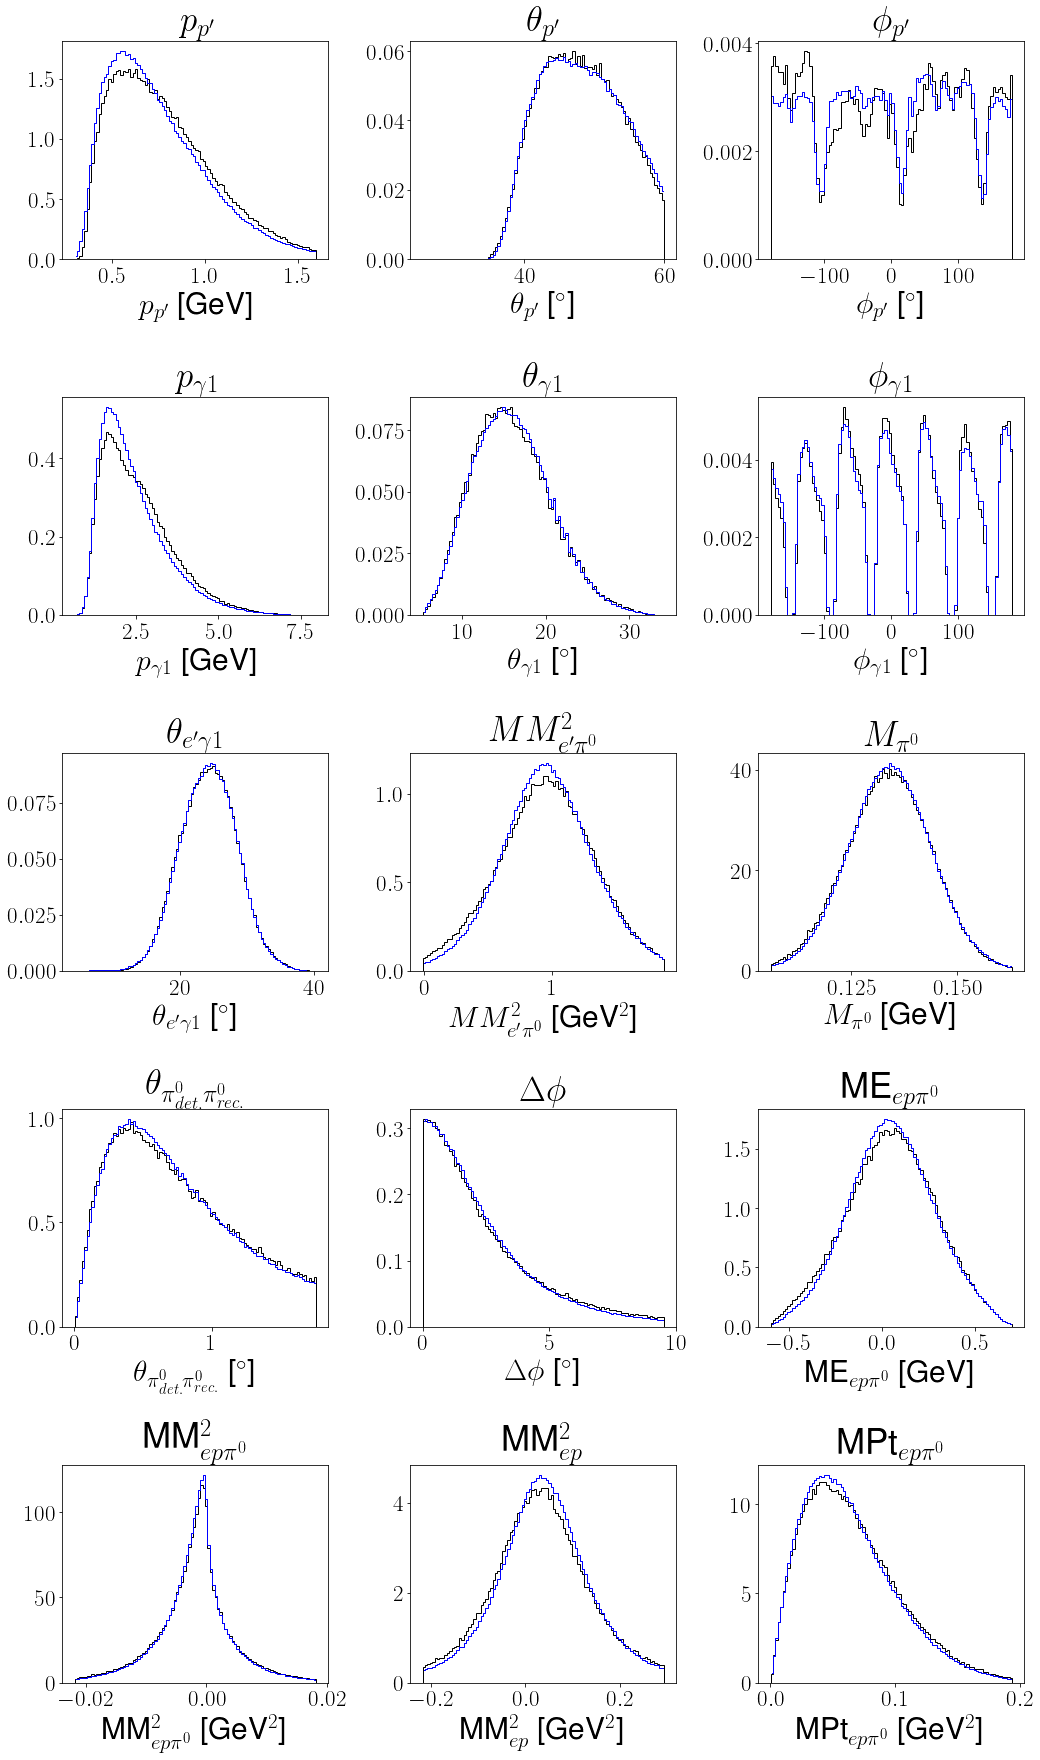

<Figure size 648x576 with 0 Axes>

In [46]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\pi^0}$", r"$M_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(pi0SimOutbCD[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(pi0ExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()

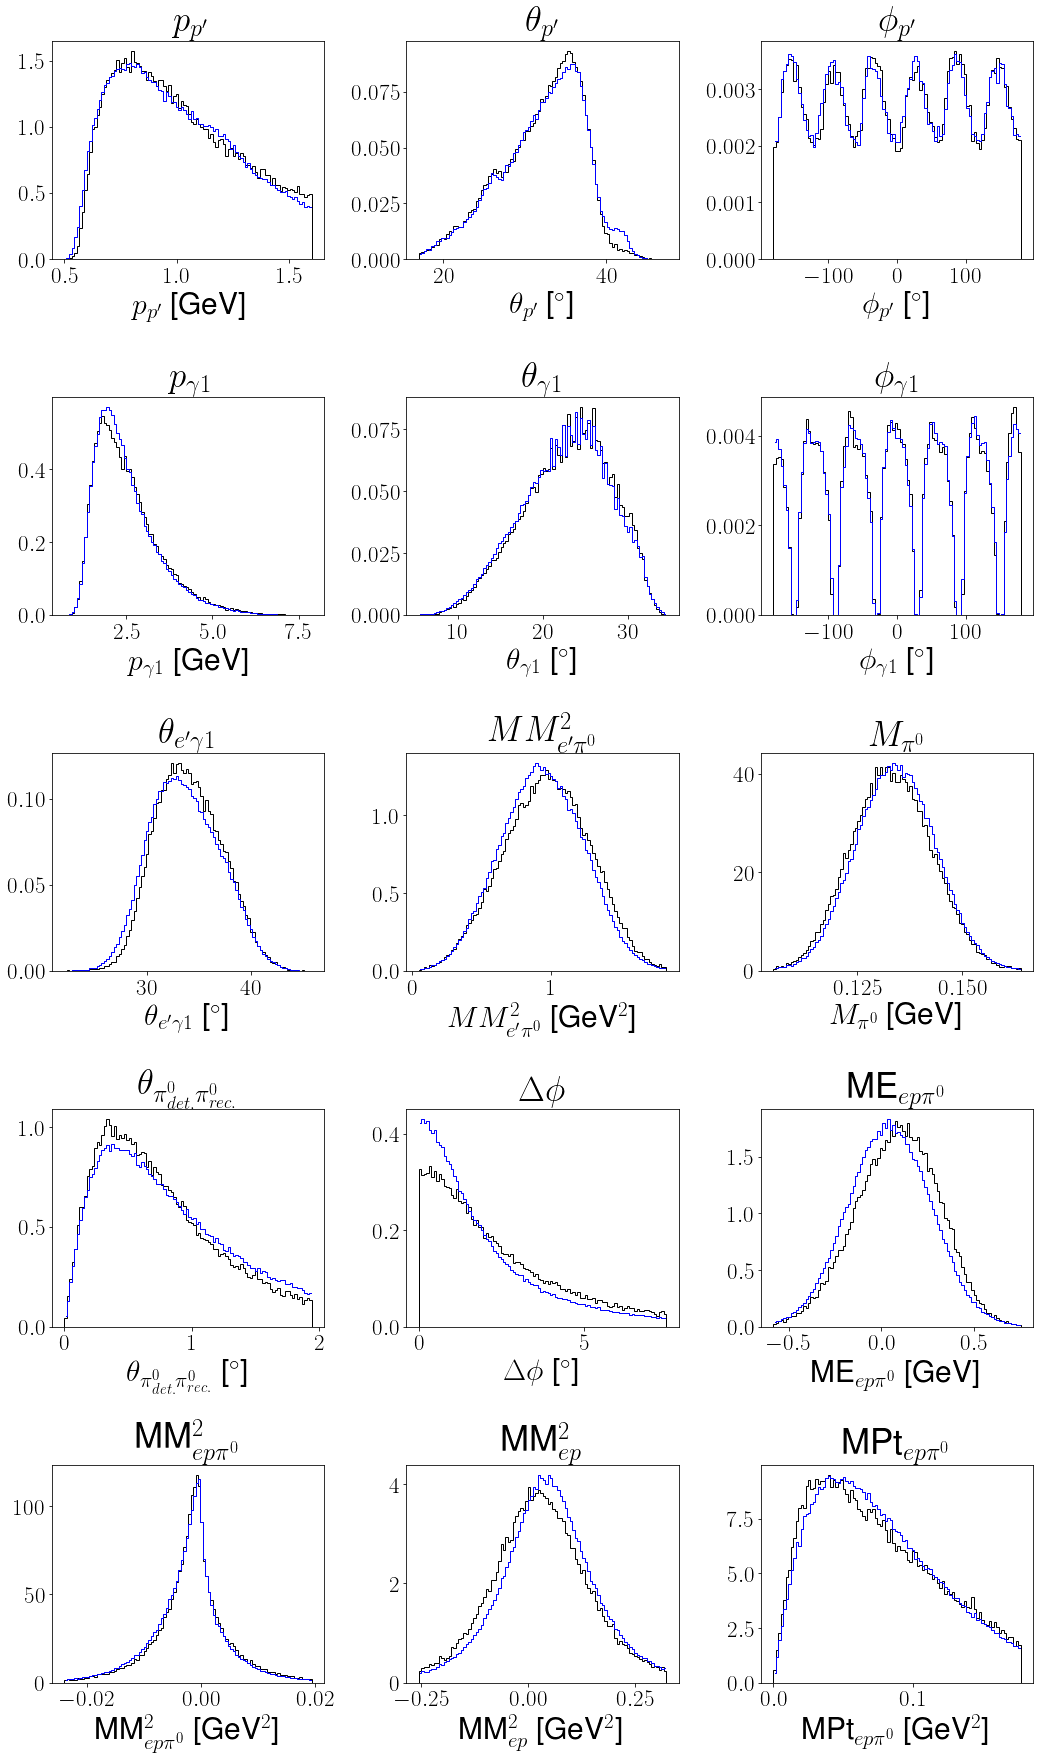

<Figure size 648x576 with 0 Axes>

In [47]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\pi^0}$", r"$M_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(pi0SimOutbFD[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(pi0ExpOutbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()

In [64]:
bhdvcsInbs = ["3987","4124","4139","4181","4182","4186","4188","4192","4397","4238"]
bhdvcsOutbs = ["4240","4250","4251","4252","4255","4263","4262","4266","4398","4249"]
pi0Inbs = ["4076", "4202", "4209", "4212", "4217", "4231"]
pi0Outbs = ["4243", "4271", "4290", "4293", "4304", "4306"]

In [88]:
result_dir = "/Volumes/Extreme SSD/Feb2022/results/"
ver = "nominal_3sigma/" 
counts = pd.read_pickle(result_dir + ver + "epgExpInb.pkl")
counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "epgExpOutb.pkl"))
counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "pi0ExpInb.pkl"))
counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "pi0ExpOutb.pkl"))
for run in bhdvcsInbs+bhdvcsOutbs:
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}speak.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}ppeak.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}Nonrad.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + "Gen/" + "{}Gen.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + "Gen/" + "{}speakGen.pkl".format(run)))
#     counts = pd.merge(counts, pd.read_pickle(result_dir + "Gen/" + "{}ppeakGen.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + "Gen/" + "{}NonradGen.pkl".format(run)))
for run in pi0Inbs+pi0Outbs:
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}bkg_1g.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}bkg_2g.pkl".format(run)))
local = counts.loc[counts.Q2xBt == "211"]
phicenters = (local.phi_i + local.phi_f)/2

In [529]:
dvcsGenInb50nA = local.loc[:, "3987Gen"] + local.loc[:, "4124Gen"] + local.loc[:, "4139Gen"] + local.loc[:, "4181Gen"] + local.loc[:, "4182Gen"] + local.loc[:, "4397Gen"]
dvcsGenInb45nA = local.loc[:, "4188Gen"]
dvcsGenInb55nA = local.loc[:, "4186Gen"]
dvcsGenOutb50nA = local.loc[:, "4240Gen"] + local.loc[:, "4250Gen"] + local.loc[:, "4251Gen"] + local.loc[:, "4255Gen"] + local.loc[:, "4255Gen"] + local.loc[:, "4398Gen"]
dvcsGenOutb40nA = local.loc[:, "4263Gen"]
dvcsGenOutb40nAT = local.loc[:, "4263Gen"]

In [603]:
sum(local.loc[:, "41862"])/sum(dvcsSimInb50nA2)*6, sum(local.loc[:, "41882"])/sum(dvcsSimInb50nA2)*6

(0.9560756202122427, 1.0134232904631388)

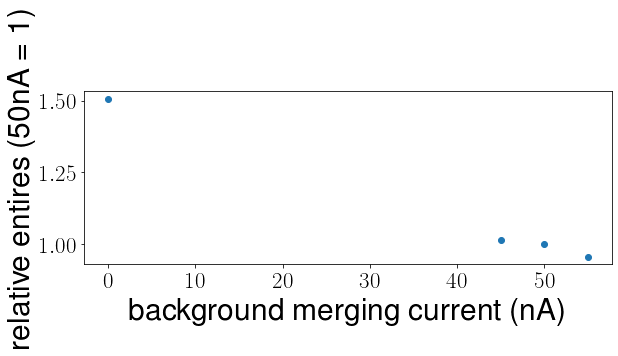

In [574]:
plt.scatter([0, 45, 50, 55], [sum(local.loc[:, "41922"])/sum(dvcsSimInb50nA2)*6, sum(local.loc[:, "41882"])/sum(dvcsSimInb50nA2)*6, 1,  sum(local.loc[:, "41862"])/sum(dvcsSimInb50nA2)*6])
plt.xlabel("background merging current (nA)")
plt.ylabel("relative entires (50nA = 1)")

plt.show()

In [579]:
epgExpInb50nA1 = local.loc[:, "epgExpInb1"]
pi0ExpInb50nA1 = local.loc[:, "pi0ExpInb1"]
dvcsSimInb50nA1 = local.loc[:, "39871"] + local.loc[:, "41241"] + local.loc[:, "41391"] + local.loc[:, "41811"] + local.loc[:, "41821"] + local.loc[:, "43971"]
bkg1gSimInb50nA1 = local.loc[:, "4076bkg_1g1"] + local.loc[:, "4202bkg_1g1"] + local.loc[:, "4209bkg_1g1"]
bkg2gSimInb50nA1 = local.loc[:, "4076bkg_2g1"] + local.loc[:, "4202bkg_2g1"] + local.loc[:, "4209bkg_2g1"]
contamination1 = np.where(np.isnan(pi0ExpInb50nA1/bkg2gSimInb50nA1*bkg1gSimInb50nA1), 0, pi0ExpInb50nA1/bkg2gSimInb50nA1*bkg1gSimInb50nA1)
dvcsExpInb50nA1 = np.where(epgExpInb50nA1 - contamination1>50, epgExpInb50nA1 - contamination1, 0)
invaccInb1 = np.where(dvcsSimInb50nA1>0, dvcsGenInb50nA/dvcsSimInb50nA1, 0)
accInb1 = dvcsSimInb50nA1/dvcsGenInb50nA
uncInb1 = np.sqrt(1/epgExpInb50nA1 + 1/pi0ExpInb50nA1 + 1/bkg2gSimInb50nA1 + 1/bkg1gSimInb50nA1 + (1-accInb1)/accInb1/dvcsGenInb50nA)
uncInb1 = np.where(uncInb1==np.inf, 0, uncInb1)

epgExpInb50nA2 = local.loc[:, "epgExpInb2"]
pi0ExpInb50nA2 = local.loc[:, "pi0ExpInb2"]
dvcsSimInb50nA2 = local.loc[:, "39872"] + local.loc[:, "41242"] + local.loc[:, "41392"] + local.loc[:, "41812"] + local.loc[:, "41822"] + local.loc[:, "43972"]
bkg1gSimInb50nA2 = local.loc[:, "4076bkg_1g2"] + local.loc[:, "4202bkg_1g2"] + local.loc[:, "4209bkg_1g2"]
bkg2gSimInb50nA2 = local.loc[:, "4076bkg_2g2"] + local.loc[:, "4202bkg_2g2"] + local.loc[:, "4209bkg_2g2"]
contamination2 = np.where(np.isnan(pi0ExpInb50nA2/bkg2gSimInb50nA2*bkg1gSimInb50nA2), 0, pi0ExpInb50nA2/bkg2gSimInb50nA2*bkg1gSimInb50nA2)
dvcsExpInb50nA2 = np.where(epgExpInb50nA2 - contamination2>50, epgExpInb50nA2 - contamination2, 0)
invaccInb2 = np.where(dvcsSimInb50nA2>0, dvcsGenInb50nA/dvcsSimInb50nA2, 0)
accInb2 = dvcsSimInb50nA2/dvcsGenInb50nA
uncInb2 = np.sqrt(1/epgExpInb50nA2 + 1/pi0ExpInb50nA2 + 1/bkg2gSimInb50nA2 + 1/bkg1gSimInb50nA2 + (1-accInb2)/accInb2/dvcsGenInb50nA)
uncInb2 = np.where(uncInb2==np.inf, 0, uncInb2)

epgExpInb50nA3 = local.loc[:, "epgExpInb3"]
pi0ExpInb50nA3 = local.loc[:, "pi0ExpInb3"]
dvcsSimInb50nA3 = local.loc[:, "39873"] + local.loc[:, "41243"] + local.loc[:, "41393"] + local.loc[:, "41813"] + local.loc[:, "41823"] + local.loc[:, "43973"]
bkg1gSimInb50nA3 = local.loc[:, "4076bkg_1g3"] + local.loc[:, "4202bkg_1g3"] + local.loc[:, "4209bkg_1g3"]
bkg2gSimInb50nA3 = local.loc[:, "4076bkg_2g3"] + local.loc[:, "4202bkg_2g3"] + local.loc[:, "4209bkg_2g3"]
contamination3 = np.where(np.isnan(pi0ExpInb50nA3/bkg2gSimInb50nA3*bkg1gSimInb50nA3), 0, pi0ExpInb50nA3/bkg2gSimInb50nA3*bkg1gSimInb50nA3)
dvcsExpInb50nA3 = np.where(epgExpInb50nA3 - contamination3>50, epgExpInb50nA3 - contamination3, 0)
invaccInb3 = np.where(dvcsSimInb50nA3>0, dvcsGenInb50nA/dvcsSimInb50nA3, 0)
accInb3 = dvcsSimInb50nA3/dvcsGenInb50nA
uncInb3 = np.sqrt(1/epgExpInb50nA3 + 1/pi0ExpInb50nA3 + 1/bkg2gSimInb50nA3 + 1/bkg1gSimInb50nA3 + (1-accInb3)/accInb3/dvcsGenInb50nA)
uncInb3 = np.where(uncInb3==np.inf, 0, uncInb3)

epgExpOutb50nA1 = local.loc[:, "epgExpOutb1"]
pi0ExpOutb50nA1 = local.loc[:, "pi0ExpOutb1"]
dvcsSimOutb50nA1 = local.loc[:, "42401"] + local.loc[:, "42501"] + local.loc[:, "42511"] + local.loc[:, "42521"] + local.loc[:, "42551"] + local.loc[:, "43981"]
bkg1gSimOutb50nA1 = local.loc[:, "4243bkg_1g1"] + local.loc[:, "4271bkg_1g1"] + local.loc[:, "4290bkg_1g1"]
bkg2gSimOutb50nA1 = local.loc[:, "4243bkg_2g1"] + local.loc[:, "4271bkg_2g1"] + local.loc[:, "4290bkg_2g1"]
contamination1 = np.where(np.isnan(pi0ExpOutb50nA1/bkg2gSimOutb50nA1*bkg1gSimOutb50nA1), 0, pi0ExpOutb50nA1/bkg2gSimOutb50nA1*bkg1gSimOutb50nA1)
dvcsExpOutb50nA1 = np.where(epgExpOutb50nA1 - contamination1>50, epgExpOutb50nA1 - contamination1, 0)
invaccOutb1 = np.where(dvcsSimOutb50nA1>0, dvcsGenOutb50nA/dvcsSimOutb50nA1, 0)
accOutb1 = dvcsSimOutb50nA1/dvcsGenOutb50nA
uncOutb1 = np.sqrt(1/epgExpOutb50nA1 + 1/pi0ExpOutb50nA1 + 1/bkg2gSimOutb50nA1 + 1/bkg1gSimOutb50nA1 + (1-accOutb1)/accOutb1/dvcsGenOutb50nA)
uncOutb1 = np.where(uncOutb1==np.inf, 0, uncOutb1)

epgExpOutb50nA2 = local.loc[:, "epgExpOutb2"]
pi0ExpOutb50nA2 = local.loc[:, "pi0ExpOutb2"]
dvcsSimOutb50nA2 = local.loc[:, "42402"] + local.loc[:, "42502"] + local.loc[:, "42512"] + local.loc[:, "42522"] + local.loc[:, "42552"] + local.loc[:, "43982"]
bkg1gSimOutb50nA2 = local.loc[:, "4243bkg_1g2"] + local.loc[:, "4271bkg_1g2"] + local.loc[:, "4290bkg_1g2"]
bkg2gSimOutb50nA2 = local.loc[:, "4243bkg_2g2"] + local.loc[:, "4271bkg_2g2"] + local.loc[:, "4290bkg_2g2"]
contamination2 = np.where(np.isnan(pi0ExpOutb50nA2/bkg2gSimOutb50nA2*bkg1gSimOutb50nA2), 0, pi0ExpOutb50nA2/bkg2gSimOutb50nA2*bkg1gSimOutb50nA2)
dvcsExpOutb50nA2 = np.where(epgExpOutb50nA2 - contamination2>50, epgExpOutb50nA2 - contamination2, 0)
invaccOutb2 = np.where(dvcsSimOutb50nA2>0, dvcsGenOutb50nA/dvcsSimOutb50nA2, 0)
accOutb2 = dvcsSimOutb50nA2/dvcsGenOutb50nA
uncOutb2 = np.sqrt(1/epgExpOutb50nA2 + 1/pi0ExpOutb50nA2 + 1/bkg2gSimOutb50nA2 + 1/bkg1gSimOutb50nA2 + (1-accOutb2)/accOutb2/dvcsGenOutb50nA)
uncOutb2 = np.where(uncOutb2==np.inf, 0, uncOutb2)

epgExpOutb50nA3 = local.loc[:, "epgExpOutb3"]
pi0ExpOutb50nA3 = local.loc[:, "pi0ExpOutb3"]
dvcsSimOutb50nA3 = local.loc[:, "42403"] + local.loc[:, "42503"] + local.loc[:, "42513"] + local.loc[:, "42523"] + local.loc[:, "42553"] + local.loc[:, "43983"]
bkg1gSimOutb50nA3 = local.loc[:, "4243bkg_1g3"] + local.loc[:, "4271bkg_1g3"] + local.loc[:, "4290bkg_1g3"]
bkg2gSimOutb50nA3 = local.loc[:, "4243bkg_2g3"] + local.loc[:, "4271bkg_2g3"] + local.loc[:, "4290bkg_2g3"]
contamination3 = np.where(np.isnan(pi0ExpOutb50nA3/bkg2gSimOutb50nA3*bkg1gSimOutb50nA3), 0, pi0ExpOutb50nA3/bkg2gSimOutb50nA3*bkg1gSimOutb50nA3)
dvcsExpOutb50nA3 = np.where(epgExpOutb50nA3 - contamination3>50, epgExpOutb50nA3 - contamination3, 0)
invaccOutb3 = np.where(dvcsSimOutb50nA3>0, dvcsGenOutb50nA/dvcsSimOutb50nA3, 0)
accOutb3 = dvcsSimOutb50nA3/dvcsGenOutb50nA
uncOutb3 = np.sqrt(1/epgExpOutb50nA3 + 1/pi0ExpOutb50nA3 + 1/bkg2gSimOutb50nA3 + 1/bkg1gSimOutb50nA3 + (1-accOutb3)/accOutb3/dvcsGenOutb50nA)
uncOutb3 = np.where(uncOutb3==np.inf, 0, uncOutb3)

uncInb1 = uncInb1*dvcsExpInb50nA1*invaccInb1/local.binVol/56.5/10**6
uncInb2 = uncInb2*dvcsExpInb50nA2*invaccInb2/local.binVol/56.5/10**6
uncInb3 = uncInb3*dvcsExpInb50nA3*invaccInb3/local.binVol/56.5/10**6
uncOutb1 = uncOutb1*dvcsExpOutb50nA1*invaccOutb1/local.binVol/47.5/10**6
uncOutb2 = uncOutb2*dvcsExpOutb50nA2*invaccOutb2/local.binVol/47.5/10**6
uncOutb3 = uncOutb3*dvcsExpOutb50nA3*invaccOutb3/local.binVol/47.5/10**6

weightInb1 = np.where(1/uncInb1**2==np.inf, 0, 1/uncInb1**2)
weightInb2 = np.where(1/uncInb2**2==np.inf, 0, 1/uncInb2**2)
weightInb3 = np.where(1/uncInb3**2==np.inf, 0, 1/uncInb3**2)
weightOutb1 = np.where(1/uncOutb1**2==np.inf, 0, 1/uncOutb1**2)
weightOutb2 = np.where(1/uncOutb2**2==np.inf, 0, 1/uncOutb2**2)
weightOutb3 = np.where(1/uncOutb3**2==np.inf, 0, 1/uncOutb3**2)

xsec_local = (dvcsExpInb50nA1*invaccInb1/local.binVol/56.5/10**6*weightInb1 + dvcsExpInb50nA2*invaccInb2/local.binVol/56.5/10**6*weightInb2 + dvcsExpInb50nA3*invaccInb3/local.binVol/56.5/10**6*weightInb3 + dvcsExpOutb50nA1*invaccOutb1/local.binVol/47.5/10**6*weightOutb1 + dvcsExpOutb50nA2*invaccOutb2/local.binVol/47.5/10**6*weightOutb2 + dvcsExpOutb50nA3*invaccOutb3/local.binVol/47.5/10**6*weightOutb3)/(weightInb1 + weightInb2 + weightInb3 + weightOutb1 + weightOutb2 + weightOutb3)
xsec_local_unc = np.sqrt(1/(weightInb1 + weightInb2 + weightInb3 + weightOutb1 + weightOutb2 + weightOutb3))

In [604]:
epgExpInb50nA1 = np.array(clasqaepgExpInb1)
pi0ExpInb50nA1 = local.loc[:, "pi0ExpInb1"]
dvcsSimInb50nA1 = local.loc[:, "39871"] + local.loc[:, "41241"] + local.loc[:, "41391"] + local.loc[:, "41811"] + local.loc[:, "41821"] + local.loc[:, "43971"]
bkg1gSimInb50nA1 = local.loc[:, "4076bkg_1g1"] + local.loc[:, "4202bkg_1g1"] + local.loc[:, "4209bkg_1g1"]
bkg2gSimInb50nA1 = local.loc[:, "4076bkg_2g1"] + local.loc[:, "4202bkg_2g1"] + local.loc[:, "4209bkg_2g1"]
contamination1 = np.where(np.isnan(np.sum(pi0ExpInb50nA1)/np.sum(bkg2gSimInb50nA1)*bkg1gSimInb50nA1), 0, np.sum(pi0ExpInb50nA1)/np.sum(bkg2gSimInb50nA1)*bkg1gSimInb50nA1)
dvcsExpInb50nA1 = np.where(epgExpInb50nA1 - contamination1>50, epgExpInb50nA1 - contamination1, 0)
invaccInb1 = np.where(dvcsSimInb50nA1>0, dvcsGenInb50nA/dvcsSimInb50nA1, 0)
accInb1 = dvcsSimInb50nA1/dvcsGenInb50nA
uncInb1 = np.sqrt(1/epgExpInb50nA1 + 1/np.sum(pi0ExpInb50nA1) + 1/np.sum(bkg2gSimInb50nA1) + 1/bkg1gSimInb50nA1 + (1-accInb1)/accInb1/dvcsGenInb50nA)
uncInb1 = np.where(uncInb1==np.inf, 0, uncInb1)

epgExpInb50nA2 = np.array(clasqaepgExpInb2)
pi0ExpInb50nA2 = local.loc[:, "pi0ExpInb2"]
dvcsSimInb50nA2 = local.loc[:, "39872"] + local.loc[:, "41242"] + local.loc[:, "41392"] + local.loc[:, "41812"] + local.loc[:, "41822"] + local.loc[:, "43972"]
bkg1gSimInb50nA2 = local.loc[:, "4076bkg_1g2"] + local.loc[:, "4202bkg_1g2"] + local.loc[:, "4209bkg_1g2"]
bkg2gSimInb50nA2 = local.loc[:, "4076bkg_2g2"] + local.loc[:, "4202bkg_2g2"] + local.loc[:, "4209bkg_2g2"]
contamination2 = np.where(np.isnan(np.sum(pi0ExpInb50nA2)/np.sum(bkg2gSimInb50nA2)*bkg1gSimInb50nA2), 0, np.sum(pi0ExpInb50nA2)/np.sum(bkg2gSimInb50nA2)*bkg1gSimInb50nA2)
dvcsExpInb50nA2 = np.where(epgExpInb50nA2 - contamination2>50, epgExpInb50nA2 - contamination2, 0)
invaccInb2 = np.where(dvcsSimInb50nA2>0, dvcsGenInb50nA/dvcsSimInb50nA2, 0)
accInb2 = dvcsSimInb50nA2/dvcsGenInb50nA
uncInb2 = np.sqrt(1/epgExpInb50nA2 + 1/np.sum(pi0ExpInb50nA2) + 1/np.sum(bkg2gSimInb50nA2) + 1/bkg1gSimInb50nA2 + (1-accInb2)/accInb2/dvcsGenInb50nA)
uncInb2 = np.where(uncInb2==np.inf, 0, uncInb2)

epgExpInb50nA3 = np.array(clasqaepgExpInb3)
pi0ExpInb50nA3 = local.loc[:, "pi0ExpInb3"]
dvcsSimInb50nA3 = local.loc[:, "39873"] + local.loc[:, "41243"] + local.loc[:, "41393"] + local.loc[:, "41813"] + local.loc[:, "41823"] + local.loc[:, "43973"]
bkg1gSimInb50nA3 = local.loc[:, "4076bkg_1g3"] + local.loc[:, "4202bkg_1g3"] + local.loc[:, "4209bkg_1g3"]
bkg2gSimInb50nA3 = local.loc[:, "4076bkg_2g3"] + local.loc[:, "4202bkg_2g3"] + local.loc[:, "4209bkg_2g3"]
contamination3 = np.where(np.isnan(np.sum(pi0ExpInb50nA3)/np.sum(bkg2gSimInb50nA3)*bkg1gSimInb50nA3), 0, np.sum(pi0ExpInb50nA3)/np.sum(bkg2gSimInb50nA3)*bkg1gSimInb50nA3)
dvcsExpInb50nA3 = np.where(epgExpInb50nA3 - contamination3>50, epgExpInb50nA3 - contamination3, 0)
invaccInb3 = np.where(dvcsSimInb50nA3>0, dvcsGenInb50nA/dvcsSimInb50nA3, 0)
accInb3 = dvcsSimInb50nA3/dvcsGenInb50nA
uncInb3 = np.sqrt(1/epgExpInb50nA3 + 1/np.sum(pi0ExpInb50nA3) + 1/np.sum(bkg2gSimInb50nA3) + 1/bkg1gSimInb50nA3 + (1-accInb3)/accInb3/dvcsGenInb50nA)
uncInb3 = np.where(uncInb3==np.inf, 0, uncInb3)

epgExpOutb50nA1 = np.array(clasqaepgExpOutb1)
pi0ExpOutb50nA1 = local.loc[:, "pi0ExpOutb1"]
dvcsSimOutb50nA1 = local.loc[:, "42401"] + local.loc[:, "42501"] + local.loc[:, "42511"] + local.loc[:, "42521"] + local.loc[:, "42551"] + local.loc[:, "43981"]
bkg1gSimOutb50nA1 = local.loc[:, "4243bkg_1g1"] + local.loc[:, "4271bkg_1g1"] + local.loc[:, "4290bkg_1g1"]
bkg2gSimOutb50nA1 = local.loc[:, "4243bkg_2g1"] + local.loc[:, "4271bkg_2g1"] + local.loc[:, "4290bkg_2g1"]
contamination1 = np.where(np.isnan(np.sum(pi0ExpOutb50nA1)/np.sum(bkg2gSimOutb50nA1)*bkg1gSimOutb50nA1), 0, np.sum(pi0ExpOutb50nA1)/np.sum(bkg2gSimOutb50nA1)*bkg1gSimOutb50nA1)
dvcsExpOutb50nA1 = np.where(epgExpOutb50nA1 - contamination1>50, epgExpOutb50nA1 - contamination1, 0)
invaccOutb1 = np.where(dvcsSimOutb50nA1>0, dvcsGenOutb50nA/dvcsSimOutb50nA1, 0)
accOutb1 = dvcsSimOutb50nA1/dvcsGenOutb50nA
uncOutb1 = np.sqrt(1/epgExpOutb50nA1 + 1/np.sum(pi0ExpOutb50nA1) + 1/np.sum(bkg2gSimOutb50nA1) + 1/bkg1gSimOutb50nA1 + (1-accOutb1)/accOutb1/dvcsGenOutb50nA)
uncOutb1 = np.where(uncOutb1==np.inf, 0, uncOutb1)

epgExpOutb50nA2 = np.array(clasqaepgExpOutb2)
pi0ExpOutb50nA2 = local.loc[:, "pi0ExpOutb2"]
dvcsSimOutb50nA2 = local.loc[:, "42402"] + local.loc[:, "42502"] + local.loc[:, "42512"] + local.loc[:, "42522"] + local.loc[:, "42552"] + local.loc[:, "43982"]
bkg1gSimOutb50nA2 = local.loc[:, "4243bkg_1g2"] + local.loc[:, "4271bkg_1g2"] + local.loc[:, "4290bkg_1g2"]
bkg2gSimOutb50nA2 = local.loc[:, "4243bkg_2g2"] + local.loc[:, "4271bkg_2g2"] + local.loc[:, "4290bkg_2g2"]
contamination2 = np.where(np.isnan(np.sum(pi0ExpOutb50nA2)/np.sum(bkg2gSimOutb50nA2)*bkg1gSimOutb50nA2), 0, np.sum(pi0ExpOutb50nA2)/np.sum(bkg2gSimOutb50nA2)*bkg1gSimOutb50nA2)
dvcsExpOutb50nA2 = np.where(epgExpOutb50nA2 - contamination2>50, epgExpOutb50nA2 - contamination2, 0)
invaccOutb2 = np.where(dvcsSimOutb50nA2>0, dvcsGenOutb50nA/dvcsSimOutb50nA2, 0)
accOutb2 = dvcsSimOutb50nA2/dvcsGenOutb50nA
uncOutb2 = np.sqrt(1/epgExpOutb50nA2 + 1/np.sum(pi0ExpOutb50nA2) + 1/np.sum(bkg2gSimOutb50nA2) + 1/bkg1gSimOutb50nA2 + (1-accOutb2)/accOutb2/dvcsGenOutb50nA)
uncOutb2 = np.where(uncOutb2==np.inf, 0, uncOutb2)

epgExpOutb50nA3 = np.array(clasqaepgExpOutb3)
pi0ExpOutb50nA3 = local.loc[:, "pi0ExpOutb3"]
dvcsSimOutb50nA3 = local.loc[:, "42403"] + local.loc[:, "42503"] + local.loc[:, "42513"] + local.loc[:, "42523"] + local.loc[:, "42553"] + local.loc[:, "43983"]
bkg1gSimOutb50nA3 = local.loc[:, "4243bkg_1g3"] + local.loc[:, "4271bkg_1g3"] + local.loc[:, "4290bkg_1g3"]
bkg2gSimOutb50nA3 = local.loc[:, "4243bkg_2g3"] + local.loc[:, "4271bkg_2g3"] + local.loc[:, "4290bkg_2g3"]
contamination3 = np.where(np.isnan(np.sum(pi0ExpOutb50nA3)/np.sum(bkg2gSimOutb50nA3)*bkg1gSimOutb50nA3), 0, np.sum(pi0ExpOutb50nA3)/np.sum(bkg2gSimOutb50nA3)*bkg1gSimOutb50nA3)
dvcsExpOutb50nA3 = np.where(epgExpOutb50nA3 - contamination3>50, epgExpOutb50nA3 - contamination3, 0)
invaccOutb3 = np.where(dvcsSimOutb50nA3>0, dvcsGenOutb50nA/dvcsSimOutb50nA3, 0)
accOutb3 = dvcsSimOutb50nA3/dvcsGenOutb50nA
uncOutb3 = np.sqrt(1/epgExpOutb50nA3 + 1/np.sum(pi0ExpOutb50nA3) + 1/np.sum(bkg2gSimOutb50nA3) + 1/bkg1gSimOutb50nA3 + (1-accOutb3)/accOutb3/dvcsGenOutb50nA)
uncOutb3 = np.where(uncOutb3==np.inf, 0, uncOutb3)

uncInb1 = uncInb1*dvcsExpInb50nA1*invaccInb1/local.binVol/clasqachargeInb/10**6
uncInb2 = uncInb2*dvcsExpInb50nA2*invaccInb2/local.binVol/clasqachargeInb/10**6
uncInb3 = uncInb3*dvcsExpInb50nA3*invaccInb3/local.binVol/clasqachargeInb/10**6
uncOutb1 = uncOutb1*dvcsExpOutb50nA1*invaccOutb1/local.binVol/clasqachargeOutb/10**6
uncOutb2 = uncOutb2*dvcsExpOutb50nA2*invaccOutb2/local.binVol/clasqachargeOutb/10**6
uncOutb3 = uncOutb3*dvcsExpOutb50nA3*invaccOutb3/local.binVol/clasqachargeOutb/10**6

weightInb1 = np.where(1/uncInb1**2==np.inf, 0, 1/uncInb1**2)
weightInb2 = np.where(1/uncInb2**2==np.inf, 0, 1/uncInb2**2)
weightInb3 = np.where(1/uncInb3**2==np.inf, 0, 1/uncInb3**2)
weightOutb1 = np.where(1/uncOutb1**2==np.inf, 0, 1/uncOutb1**2)
weightOutb2 = np.where(1/uncOutb2**2==np.inf, 0, 1/uncOutb2**2)
weightOutb3 = np.where(1/uncOutb3**2==np.inf, 0, 1/uncOutb3**2)

clasqaxsec_local2 = (dvcsExpInb50nA1*invaccInb1/local.binVol/clasqachargeInb/10**6*weightInb1 + dvcsExpInb50nA2*invaccInb2/local.binVol/clasqachargeInb/10**6*weightInb2 + dvcsExpInb50nA3*invaccInb3/local.binVol/clasqachargeInb/10**6*weightInb3 + dvcsExpOutb50nA1*invaccOutb1/local.binVol/clasqachargeOutb/10**6*weightOutb1 + dvcsExpOutb50nA2*invaccOutb2/local.binVol/clasqachargeOutb/10**6*weightOutb2 + dvcsExpOutb50nA3*invaccOutb3/local.binVol/clasqachargeOutb/10**6*weightOutb3)/(weightInb1 + weightInb2 + weightInb3 + weightOutb1 + weightOutb2 + weightOutb3)
clasqaxsec_local_unc2 = np.sqrt(1/(weightInb1 + weightInb2 + weightInb3 + weightOutb1 + weightOutb2 + weightOutb3))

<ipython-input-604-1aad995a7797>:10: RuntimeWarning: divide by zero encountered in true_divide
  uncInb1 = np.sqrt(1/epgExpInb50nA1 + 1/np.sum(pi0ExpInb50nA1) + 1/np.sum(bkg2gSimInb50nA1) + 1/bkg1gSimInb50nA1 + (1-accInb1)/accInb1/dvcsGenInb50nA)
<ipython-input-604-1aad995a7797>:22: RuntimeWarning: divide by zero encountered in true_divide
  uncInb2 = np.sqrt(1/epgExpInb50nA2 + 1/np.sum(pi0ExpInb50nA2) + 1/np.sum(bkg2gSimInb50nA2) + 1/bkg1gSimInb50nA2 + (1-accInb2)/accInb2/dvcsGenInb50nA)
<ipython-input-604-1aad995a7797>:34: RuntimeWarning: divide by zero encountered in true_divide
  uncInb3 = np.sqrt(1/epgExpInb50nA3 + 1/np.sum(pi0ExpInb50nA3) + 1/np.sum(bkg2gSimInb50nA3) + 1/bkg1gSimInb50nA3 + (1-accInb3)/accInb3/dvcsGenInb50nA)
<ipython-input-604-1aad995a7797>:46: RuntimeWarning: divide by zero encountered in true_divide
  uncOutb1 = np.sqrt(1/epgExpOutb50nA1 + 1/np.sum(pi0ExpOutb50nA1) + 1/np.sum(bkg2gSimOutb50nA1) + 1/bkg1gSimOutb50nA1 + (1-accOutb1)/accOutb1/dvcsGenOutb50nA)
<ipy

In [620]:
result_dir = "/Volumes/Extreme SSD/Feb2022/results/"
ver = "nominal_3sigma/" 
counts = pd.read_pickle(result_dir + ver + "epgExpInb.pkl")
counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "epgExpOutb.pkl"))
counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "pi0ExpInb.pkl"))
counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "pi0ExpOutb.pkl"))
ver = "oneptwo_3sigma/" 
for run in bhdvcsInbs+bhdvcsOutbs:
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}speak.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}ppeak.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}Nonrad.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + "Gen/" + "{}Gen.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + "Gen/" + "{}speakGen.pkl".format(run)))
#     counts = pd.merge(counts, pd.read_pickle(result_dir + "Gen/" + "{}ppeakGen.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + "Gen/" + "{}NonradGen.pkl".format(run)))
for run in pi0Inbs+pi0Outbs:
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}bkg_1g.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}bkg_2g.pkl".format(run)))
local = counts.loc[counts.Q2xBt == "211"]
phicenters = (local.phi_i + local.phi_f)/2

In [621]:
epgExpInb50nA1 = np.array(clasqaepgExpInb1)
pi0ExpInb50nA1 = local.loc[:, "pi0ExpInb1"]
dvcsSimInb50nA1 = local.loc[:, "39871"] + local.loc[:, "41241"] + local.loc[:, "41391"] + local.loc[:, "41811"] + local.loc[:, "41821"] + local.loc[:, "43971"]
bkg1gSimInb50nA1 = local.loc[:, "4076bkg_1g1"] + local.loc[:, "4202bkg_1g1"] + local.loc[:, "4209bkg_1g1"]
bkg2gSimInb50nA1 = local.loc[:, "4076bkg_2g1"] + local.loc[:, "4202bkg_2g1"] + local.loc[:, "4209bkg_2g1"]
contamination1 = np.where(np.isnan(pi0ExpInb50nA1/bkg2gSimInb50nA1*bkg1gSimInb50nA1), 0, pi0ExpInb50nA1/bkg2gSimInb50nA1*bkg1gSimInb50nA1)
dvcsExpInb50nA1 = np.where(epgExpInb50nA1 - contamination1>50, epgExpInb50nA1 - contamination1, 0)
invaccInb1 = np.where(dvcsSimInb50nA1>0, dvcsGenInb50nA/dvcsSimInb50nA1, 0)
accInb1 = dvcsSimInb50nA1/dvcsGenInb50nA
uncInb1 = np.sqrt(1/epgExpInb50nA1 + 1/pi0ExpInb50nA1 + 1/bkg2gSimInb50nA1 + 1/bkg1gSimInb50nA1 + (1-accInb1)/accInb1/dvcsGenInb50nA)
uncInb1 = np.where(uncInb1==np.inf, 0, uncInb1)

epgExpInb50nA2 = np.array(clasqaepgExpInb2)
pi0ExpInb50nA2 = local.loc[:, "pi0ExpInb2"]
dvcsSimInb50nA2 = local.loc[:, "39872"] + local.loc[:, "41242"] + local.loc[:, "41392"] + local.loc[:, "41812"] + local.loc[:, "41822"] + local.loc[:, "43972"]
bkg1gSimInb50nA2 = local.loc[:, "4076bkg_1g2"] + local.loc[:, "4202bkg_1g2"] + local.loc[:, "4209bkg_1g2"]
bkg2gSimInb50nA2 = local.loc[:, "4076bkg_2g2"] + local.loc[:, "4202bkg_2g2"] + local.loc[:, "4209bkg_2g2"]
contamination2 = np.where(np.isnan(pi0ExpInb50nA2/bkg2gSimInb50nA2*bkg1gSimInb50nA2), 0, pi0ExpInb50nA2/bkg2gSimInb50nA2*bkg1gSimInb50nA2)
dvcsExpInb50nA2 = np.where(epgExpInb50nA2 - contamination2>50, epgExpInb50nA2 - contamination2, 0)
invaccInb2 = np.where(dvcsSimInb50nA2>0, dvcsGenInb50nA/dvcsSimInb50nA2, 0)
accInb2 = dvcsSimInb50nA2/dvcsGenInb50nA
uncInb2 = np.sqrt(1/epgExpInb50nA2 + 1/pi0ExpInb50nA2 + 1/bkg2gSimInb50nA2 + 1/bkg1gSimInb50nA2 + (1-accInb2)/accInb2/dvcsGenInb50nA)
uncInb2 = np.where(uncInb2==np.inf, 0, uncInb2)

epgExpInb50nA3 = np.array(clasqaepgExpInb3)
pi0ExpInb50nA3 = local.loc[:, "pi0ExpInb3"]
dvcsSimInb50nA3 = local.loc[:, "39873"] + local.loc[:, "41243"] + local.loc[:, "41393"] + local.loc[:, "41813"] + local.loc[:, "41823"] + local.loc[:, "43973"]
bkg1gSimInb50nA3 = local.loc[:, "4076bkg_1g3"] + local.loc[:, "4202bkg_1g3"] + local.loc[:, "4209bkg_1g3"]
bkg2gSimInb50nA3 = local.loc[:, "4076bkg_2g3"] + local.loc[:, "4202bkg_2g3"] + local.loc[:, "4209bkg_2g3"]
contamination3 = np.where(np.isnan(pi0ExpInb50nA3/bkg2gSimInb50nA3*bkg1gSimInb50nA3), 0, pi0ExpInb50nA3/bkg2gSimInb50nA3*bkg1gSimInb50nA3)
dvcsExpInb50nA3 = np.where(epgExpInb50nA3 - contamination3>50, epgExpInb50nA3 - contamination3, 0)
invaccInb3 = np.where(dvcsSimInb50nA3>0, dvcsGenInb50nA/dvcsSimInb50nA3, 0)
accInb3 = dvcsSimInb50nA3/dvcsGenInb50nA
uncInb3 = np.sqrt(1/epgExpInb50nA3 + 1/pi0ExpInb50nA3 + 1/bkg2gSimInb50nA3 + 1/bkg1gSimInb50nA3 + (1-accInb3)/accInb3/dvcsGenInb50nA)
uncInb3 = np.where(uncInb3==np.inf, 0, uncInb3)

epgExpOutb50nA1 = np.array(clasqaepgExpOutb1)
pi0ExpOutb50nA1 = local.loc[:, "pi0ExpOutb1"]
dvcsSimOutb50nA1 = local.loc[:, "42401"] + local.loc[:, "42501"] + local.loc[:, "42511"] + local.loc[:, "42521"] + local.loc[:, "42551"] + local.loc[:, "43981"]
bkg1gSimOutb50nA1 = local.loc[:, "4243bkg_1g1"] + local.loc[:, "4271bkg_1g1"] + local.loc[:, "4290bkg_1g1"]
bkg2gSimOutb50nA1 = local.loc[:, "4243bkg_2g1"] + local.loc[:, "4271bkg_2g1"] + local.loc[:, "4290bkg_2g1"]
contamination1 = np.where(np.isnan(pi0ExpOutb50nA1/bkg2gSimOutb50nA1*bkg1gSimOutb50nA1), 0, pi0ExpOutb50nA1/bkg2gSimOutb50nA1*bkg1gSimOutb50nA1)
dvcsExpOutb50nA1 = np.where(epgExpOutb50nA1 - contamination1>50, epgExpOutb50nA1 - contamination1, 0)
invaccOutb1 = np.where(dvcsSimOutb50nA1>0, dvcsGenOutb50nA/dvcsSimOutb50nA1, 0)
accOutb1 = dvcsSimOutb50nA1/dvcsGenOutb50nA
uncOutb1 = np.sqrt(1/epgExpOutb50nA1 + 1/pi0ExpOutb50nA1 + 1/bkg2gSimOutb50nA1 + 1/bkg1gSimOutb50nA1 + (1-accOutb1)/accOutb1/dvcsGenOutb50nA)
uncOutb1 = np.where(uncOutb1==np.inf, 0, uncOutb1)

epgExpOutb50nA2 = np.array(clasqaepgExpOutb2)
pi0ExpOutb50nA2 = local.loc[:, "pi0ExpOutb2"]
dvcsSimOutb50nA2 = local.loc[:, "42402"] + local.loc[:, "42502"] + local.loc[:, "42512"] + local.loc[:, "42522"] + local.loc[:, "42552"] + local.loc[:, "43982"]
bkg1gSimOutb50nA2 = local.loc[:, "4243bkg_1g2"] + local.loc[:, "4271bkg_1g2"] + local.loc[:, "4290bkg_1g2"]
bkg2gSimOutb50nA2 = local.loc[:, "4243bkg_2g2"] + local.loc[:, "4271bkg_2g2"] + local.loc[:, "4290bkg_2g2"]
contamination2 = np.where(np.isnan(pi0ExpOutb50nA2/bkg2gSimOutb50nA2*bkg1gSimOutb50nA2), 0, pi0ExpOutb50nA2/bkg2gSimOutb50nA2*bkg1gSimOutb50nA2)
dvcsExpOutb50nA2 = np.where(epgExpOutb50nA2 - contamination2>50, epgExpOutb50nA2 - contamination2, 0)
invaccOutb2 = np.where(dvcsSimOutb50nA2>0, dvcsGenOutb50nA/dvcsSimOutb50nA2, 0)
accOutb2 = dvcsSimOutb50nA2/dvcsGenOutb50nA
uncOutb2 = np.sqrt(1/epgExpOutb50nA2 + 1/pi0ExpOutb50nA2 + 1/bkg2gSimOutb50nA2 + 1/bkg1gSimOutb50nA2 + (1-accOutb2)/accOutb2/dvcsGenOutb50nA)
uncOutb2 = np.where(uncOutb2==np.inf, 0, uncOutb2)

epgExpOutb50nA3 = np.array(clasqaepgExpOutb3)
pi0ExpOutb50nA3 = local.loc[:, "pi0ExpOutb3"]
dvcsSimOutb50nA3 = local.loc[:, "42403"] + local.loc[:, "42503"] + local.loc[:, "42513"] + local.loc[:, "42523"] + local.loc[:, "42553"] + local.loc[:, "43983"]
bkg1gSimOutb50nA3 = local.loc[:, "4243bkg_1g3"] + local.loc[:, "4271bkg_1g3"] + local.loc[:, "4290bkg_1g3"]
bkg2gSimOutb50nA3 = local.loc[:, "4243bkg_2g3"] + local.loc[:, "4271bkg_2g3"] + local.loc[:, "4290bkg_2g3"]
contamination3 = np.where(np.isnan(pi0ExpOutb50nA3/bkg2gSimOutb50nA3*bkg1gSimOutb50nA3), 0, pi0ExpOutb50nA3/bkg2gSimOutb50nA3*bkg1gSimOutb50nA3)
dvcsExpOutb50nA3 = np.where(epgExpOutb50nA3 - contamination3>50, epgExpOutb50nA3 - contamination3, 0)
invaccOutb3 = np.where(dvcsSimOutb50nA3>0, dvcsGenOutb50nA/dvcsSimOutb50nA3, 0)
accOutb3 = dvcsSimOutb50nA3/dvcsGenOutb50nA
uncOutb3 = np.sqrt(1/epgExpOutb50nA3 + 1/pi0ExpOutb50nA3 + 1/bkg2gSimOutb50nA3 + 1/bkg1gSimOutb50nA3 + (1-accOutb3)/accOutb3/dvcsGenOutb50nA)
uncOutb3 = np.where(uncOutb3==np.inf, 0, uncOutb3)

uncInb1 = uncInb1*dvcsExpInb50nA1*invaccInb1/local.binVol/clasqachargeInb/10**6
uncInb2 = uncInb2*dvcsExpInb50nA2*invaccInb2/local.binVol/clasqachargeInb/10**6
uncInb3 = uncInb3*dvcsExpInb50nA3*invaccInb3/local.binVol/clasqachargeInb/10**6
uncOutb1 = uncOutb1*dvcsExpOutb50nA1*invaccOutb1/local.binVol/clasqachargeOutb/10**6
uncOutb2 = uncOutb2*dvcsExpOutb50nA2*invaccOutb2/local.binVol/clasqachargeOutb/10**6
uncOutb3 = uncOutb3*dvcsExpOutb50nA3*invaccOutb3/local.binVol/clasqachargeOutb/10**6

weightInb1 = np.where(1/uncInb1**2==np.inf, 0, 1/uncInb1**2)
weightInb2 = np.where(1/uncInb2**2==np.inf, 0, 1/uncInb2**2)
weightInb3 = np.where(1/uncInb3**2==np.inf, 0, 1/uncInb3**2)
weightOutb1 = np.where(1/uncOutb1**2==np.inf, 0, 1/uncOutb1**2)
weightOutb2 = np.where(1/uncOutb2**2==np.inf, 0, 1/uncOutb2**2)
weightOutb3 = np.where(1/uncOutb3**2==np.inf, 0, 1/uncOutb3**2)

clasqaxsec_local2 = (dvcsExpInb50nA1*invaccInb1/local.binVol/clasqachargeInb/10**6*weightInb1 + dvcsExpInb50nA2*invaccInb2/local.binVol/clasqachargeInb/10**6*weightInb2 + dvcsExpInb50nA3*invaccInb3/local.binVol/clasqachargeInb/10**6*weightInb3 + dvcsExpOutb50nA1*invaccOutb1/local.binVol/clasqachargeOutb/10**6*weightOutb1 + dvcsExpOutb50nA2*invaccOutb2/local.binVol/clasqachargeOutb/10**6*weightOutb2 + dvcsExpOutb50nA3*invaccOutb3/local.binVol/clasqachargeOutb/10**6*weightOutb3)/(weightInb1 + weightInb2 + weightInb3 + weightOutb1 + weightOutb2 + weightOutb3)
clasqaxsec_local_unc2 = np.sqrt(1/(weightInb1 + weightInb2 + weightInb3 + weightOutb1 + weightOutb2 + weightOutb3))

<ipython-input-621-b74db87b4204>:10: RuntimeWarning: divide by zero encountered in true_divide
  uncInb1 = np.sqrt(1/epgExpInb50nA1 + 1/pi0ExpInb50nA1 + 1/bkg2gSimInb50nA1 + 1/bkg1gSimInb50nA1 + (1-accInb1)/accInb1/dvcsGenInb50nA)
<ipython-input-621-b74db87b4204>:22: RuntimeWarning: divide by zero encountered in true_divide
  uncInb2 = np.sqrt(1/epgExpInb50nA2 + 1/pi0ExpInb50nA2 + 1/bkg2gSimInb50nA2 + 1/bkg1gSimInb50nA2 + (1-accInb2)/accInb2/dvcsGenInb50nA)
<ipython-input-621-b74db87b4204>:34: RuntimeWarning: divide by zero encountered in true_divide
  uncInb3 = np.sqrt(1/epgExpInb50nA3 + 1/pi0ExpInb50nA3 + 1/bkg2gSimInb50nA3 + 1/bkg1gSimInb50nA3 + (1-accInb3)/accInb3/dvcsGenInb50nA)
<ipython-input-621-b74db87b4204>:46: RuntimeWarning: divide by zero encountered in true_divide
  uncOutb1 = np.sqrt(1/epgExpOutb50nA1 + 1/pi0ExpOutb50nA1 + 1/bkg2gSimOutb50nA1 + 1/bkg1gSimOutb50nA1 + (1-accOutb1)/accOutb1/dvcsGenOutb50nA)
<ipython-input-621-b74db87b4204>:70: RuntimeWarning: divide by zero 

In [634]:
result_dir = "/Volumes/Extreme SSD/Feb2022/results/"
ver = "nominal_3sigma/" 
counts = pd.read_pickle(result_dir + ver + "epgExpInb.pkl")
counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "epgExpOutb.pkl"))
counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "pi0ExpInb.pkl"))
counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "pi0ExpOutb.pkl"))
ver = "eightyp_3sigma/" 
for run in bhdvcsInbs+bhdvcsOutbs:
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}speak.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}ppeak.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}Nonrad.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + "Gen/" + "{}Gen.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + "Gen/" + "{}speakGen.pkl".format(run)))
#     counts = pd.merge(counts, pd.read_pickle(result_dir + "Gen/" + "{}ppeakGen.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + "Gen/" + "{}NonradGen.pkl".format(run)))
for run in pi0Inbs+pi0Outbs:
    if run == "4304":
        continue
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}bkg_1g.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(result_dir + ver + "{}bkg_2g.pkl".format(run)))
local = counts.loc[counts.Q2xBt == "211"]
phicenters = (local.phi_i + local.phi_f)/2

In [635]:
epgExpInb50nA1 = np.array(clasqaepgExpInb1)
pi0ExpInb50nA1 = local.loc[:, "pi0ExpInb1"]
dvcsSimInb50nA1 = local.loc[:, "39871"] + local.loc[:, "41241"] + local.loc[:, "41391"] + local.loc[:, "41811"] + local.loc[:, "41821"] + local.loc[:, "43971"]
bkg1gSimInb50nA1 = local.loc[:, "4076bkg_1g1"] + local.loc[:, "4202bkg_1g1"] + local.loc[:, "4209bkg_1g1"]
bkg2gSimInb50nA1 = local.loc[:, "4076bkg_2g1"] + local.loc[:, "4202bkg_2g1"] + local.loc[:, "4209bkg_2g1"]
contamination1 = np.where(np.isnan(pi0ExpInb50nA1/bkg2gSimInb50nA1*bkg1gSimInb50nA1), 0, pi0ExpInb50nA1/bkg2gSimInb50nA1*bkg1gSimInb50nA1)
dvcsExpInb50nA1 = np.where(epgExpInb50nA1 - contamination1>50, epgExpInb50nA1 - contamination1, 0)
invaccInb1 = np.where(dvcsSimInb50nA1>0, dvcsGenInb50nA/dvcsSimInb50nA1, 0)
accInb1 = dvcsSimInb50nA1/dvcsGenInb50nA
uncInb1 = np.sqrt(1/epgExpInb50nA1 + 1/pi0ExpInb50nA1 + 1/bkg2gSimInb50nA1 + 1/bkg1gSimInb50nA1 + (1-accInb1)/accInb1/dvcsGenInb50nA)
uncInb1 = np.where(uncInb1==np.inf, 0, uncInb1)

epgExpInb50nA2 = np.array(clasqaepgExpInb2)
pi0ExpInb50nA2 = local.loc[:, "pi0ExpInb2"]
dvcsSimInb50nA2 = local.loc[:, "39872"] + local.loc[:, "41242"] + local.loc[:, "41392"] + local.loc[:, "41812"] + local.loc[:, "41822"] + local.loc[:, "43972"]
bkg1gSimInb50nA2 = local.loc[:, "4076bkg_1g2"] + local.loc[:, "4202bkg_1g2"] + local.loc[:, "4209bkg_1g2"]
bkg2gSimInb50nA2 = local.loc[:, "4076bkg_2g2"] + local.loc[:, "4202bkg_2g2"] + local.loc[:, "4209bkg_2g2"]
contamination2 = np.where(np.isnan(pi0ExpInb50nA2/bkg2gSimInb50nA2*bkg1gSimInb50nA2), 0, pi0ExpInb50nA2/bkg2gSimInb50nA2*bkg1gSimInb50nA2)
dvcsExpInb50nA2 = np.where(epgExpInb50nA2 - contamination2>50, epgExpInb50nA2 - contamination2, 0)
invaccInb2 = np.where(dvcsSimInb50nA2>0, dvcsGenInb50nA/dvcsSimInb50nA2, 0)
accInb2 = dvcsSimInb50nA2/dvcsGenInb50nA
uncInb2 = np.sqrt(1/epgExpInb50nA2 + 1/pi0ExpInb50nA2 + 1/bkg2gSimInb50nA2 + 1/bkg1gSimInb50nA2 + (1-accInb2)/accInb2/dvcsGenInb50nA)
uncInb2 = np.where(uncInb2==np.inf, 0, uncInb2)

epgExpInb50nA3 = np.array(clasqaepgExpInb3)
pi0ExpInb50nA3 = local.loc[:, "pi0ExpInb3"]
dvcsSimInb50nA3 = local.loc[:, "39873"] + local.loc[:, "41243"] + local.loc[:, "41393"] + local.loc[:, "41813"] + local.loc[:, "41823"] + local.loc[:, "43973"]
bkg1gSimInb50nA3 = local.loc[:, "4076bkg_1g3"] + local.loc[:, "4202bkg_1g3"] + local.loc[:, "4209bkg_1g3"]
bkg2gSimInb50nA3 = local.loc[:, "4076bkg_2g3"] + local.loc[:, "4202bkg_2g3"] + local.loc[:, "4209bkg_2g3"]
contamination3 = np.where(np.isnan(pi0ExpInb50nA3/bkg2gSimInb50nA3*bkg1gSimInb50nA3), 0, pi0ExpInb50nA3/bkg2gSimInb50nA3*bkg1gSimInb50nA3)
dvcsExpInb50nA3 = np.where(epgExpInb50nA3 - contamination3>50, epgExpInb50nA3 - contamination3, 0)
invaccInb3 = np.where(dvcsSimInb50nA3>0, dvcsGenInb50nA/dvcsSimInb50nA3, 0)
accInb3 = dvcsSimInb50nA3/dvcsGenInb50nA
uncInb3 = np.sqrt(1/epgExpInb50nA3 + 1/pi0ExpInb50nA3 + 1/bkg2gSimInb50nA3 + 1/bkg1gSimInb50nA3 + (1-accInb3)/accInb3/dvcsGenInb50nA)
uncInb3 = np.where(uncInb3==np.inf, 0, uncInb3)

epgExpOutb50nA1 = np.array(clasqaepgExpOutb1)
pi0ExpOutb50nA1 = local.loc[:, "pi0ExpOutb1"]
dvcsSimOutb50nA1 = local.loc[:, "42401"] + local.loc[:, "42501"] + local.loc[:, "42511"] + local.loc[:, "42521"] + local.loc[:, "42551"] + local.loc[:, "43981"]
bkg1gSimOutb50nA1 = local.loc[:, "4243bkg_1g1"] + local.loc[:, "4271bkg_1g1"] + local.loc[:, "4290bkg_1g1"]
bkg2gSimOutb50nA1 = local.loc[:, "4243bkg_2g1"] + local.loc[:, "4271bkg_2g1"] + local.loc[:, "4290bkg_2g1"]
contamination1 = np.where(np.isnan(pi0ExpOutb50nA1/bkg2gSimOutb50nA1*bkg1gSimOutb50nA1), 0, pi0ExpOutb50nA1/bkg2gSimOutb50nA1*bkg1gSimOutb50nA1)
dvcsExpOutb50nA1 = np.where(epgExpOutb50nA1 - contamination1>50, epgExpOutb50nA1 - contamination1, 0)
invaccOutb1 = np.where(dvcsSimOutb50nA1>0, dvcsGenOutb50nA/dvcsSimOutb50nA1, 0)
accOutb1 = dvcsSimOutb50nA1/dvcsGenOutb50nA
uncOutb1 = np.sqrt(1/epgExpOutb50nA1 + 1/pi0ExpOutb50nA1 + 1/bkg2gSimOutb50nA1 + 1/bkg1gSimOutb50nA1 + (1-accOutb1)/accOutb1/dvcsGenOutb50nA)
uncOutb1 = np.where(uncOutb1==np.inf, 0, uncOutb1)

epgExpOutb50nA2 = np.array(clasqaepgExpOutb2)
pi0ExpOutb50nA2 = local.loc[:, "pi0ExpOutb2"]
dvcsSimOutb50nA2 = local.loc[:, "42402"] + local.loc[:, "42502"] + local.loc[:, "42512"] + local.loc[:, "42522"] + local.loc[:, "42552"] + local.loc[:, "43982"]
bkg1gSimOutb50nA2 = local.loc[:, "4243bkg_1g2"] + local.loc[:, "4271bkg_1g2"] + local.loc[:, "4290bkg_1g2"]
bkg2gSimOutb50nA2 = local.loc[:, "4243bkg_2g2"] + local.loc[:, "4271bkg_2g2"] + local.loc[:, "4290bkg_2g2"]
contamination2 = np.where(np.isnan(pi0ExpOutb50nA2/bkg2gSimOutb50nA2*bkg1gSimOutb50nA2), 0, pi0ExpOutb50nA2/bkg2gSimOutb50nA2*bkg1gSimOutb50nA2)
dvcsExpOutb50nA2 = np.where(epgExpOutb50nA2 - contamination2>50, epgExpOutb50nA2 - contamination2, 0)
invaccOutb2 = np.where(dvcsSimOutb50nA2>0, dvcsGenOutb50nA/dvcsSimOutb50nA2, 0)
accOutb2 = dvcsSimOutb50nA2/dvcsGenOutb50nA
uncOutb2 = np.sqrt(1/epgExpOutb50nA2 + 1/pi0ExpOutb50nA2 + 1/bkg2gSimOutb50nA2 + 1/bkg1gSimOutb50nA2 + (1-accOutb2)/accOutb2/dvcsGenOutb50nA)
uncOutb2 = np.where(uncOutb2==np.inf, 0, uncOutb2)

epgExpOutb50nA3 = np.array(clasqaepgExpOutb3)
pi0ExpOutb50nA3 = local.loc[:, "pi0ExpOutb3"]
dvcsSimOutb50nA3 = local.loc[:, "42403"] + local.loc[:, "42503"] + local.loc[:, "42513"] + local.loc[:, "42523"] + local.loc[:, "42553"] + local.loc[:, "43983"]
bkg1gSimOutb50nA3 = local.loc[:, "4243bkg_1g3"] + local.loc[:, "4271bkg_1g3"] + local.loc[:, "4290bkg_1g3"]
bkg2gSimOutb50nA3 = local.loc[:, "4243bkg_2g3"] + local.loc[:, "4271bkg_2g3"] + local.loc[:, "4290bkg_2g3"]
contamination3 = np.where(np.isnan(pi0ExpOutb50nA3/bkg2gSimOutb50nA3*bkg1gSimOutb50nA3), 0, pi0ExpOutb50nA3/bkg2gSimOutb50nA3*bkg1gSimOutb50nA3)
dvcsExpOutb50nA3 = np.where(epgExpOutb50nA3 - contamination3>50, epgExpOutb50nA3 - contamination3, 0)
invaccOutb3 = np.where(dvcsSimOutb50nA3>0, dvcsGenOutb50nA/dvcsSimOutb50nA3, 0)
accOutb3 = dvcsSimOutb50nA3/dvcsGenOutb50nA
uncOutb3 = np.sqrt(1/epgExpOutb50nA3 + 1/pi0ExpOutb50nA3 + 1/bkg2gSimOutb50nA3 + 1/bkg1gSimOutb50nA3 + (1-accOutb3)/accOutb3/dvcsGenOutb50nA)
uncOutb3 = np.where(uncOutb3==np.inf, 0, uncOutb3)

uncInb1 = uncInb1*dvcsExpInb50nA1*invaccInb1/local.binVol/clasqachargeInb/10**6
uncInb2 = uncInb2*dvcsExpInb50nA2*invaccInb2/local.binVol/clasqachargeInb/10**6
uncInb3 = uncInb3*dvcsExpInb50nA3*invaccInb3/local.binVol/clasqachargeInb/10**6
uncOutb1 = uncOutb1*dvcsExpOutb50nA1*invaccOutb1/local.binVol/clasqachargeOutb/10**6
uncOutb2 = uncOutb2*dvcsExpOutb50nA2*invaccOutb2/local.binVol/clasqachargeOutb/10**6
uncOutb3 = uncOutb3*dvcsExpOutb50nA3*invaccOutb3/local.binVol/clasqachargeOutb/10**6

weightInb1 = np.where(1/uncInb1**2==np.inf, 0, 1/uncInb1**2)
weightInb2 = np.where(1/uncInb2**2==np.inf, 0, 1/uncInb2**2)
weightInb3 = np.where(1/uncInb3**2==np.inf, 0, 1/uncInb3**2)
weightOutb1 = np.where(1/uncOutb1**2==np.inf, 0, 1/uncOutb1**2)
weightOutb2 = np.where(1/uncOutb2**2==np.inf, 0, 1/uncOutb2**2)
weightOutb3 = np.where(1/uncOutb3**2==np.inf, 0, 1/uncOutb3**2)

clasqaxsec_local3= (dvcsExpInb50nA1*invaccInb1/local.binVol/clasqachargeInb/10**6*weightInb1 + dvcsExpInb50nA2*invaccInb2/local.binVol/clasqachargeInb/10**6*weightInb2 + dvcsExpInb50nA3*invaccInb3/local.binVol/clasqachargeInb/10**6*weightInb3 + dvcsExpOutb50nA1*invaccOutb1/local.binVol/clasqachargeOutb/10**6*weightOutb1 + dvcsExpOutb50nA2*invaccOutb2/local.binVol/clasqachargeOutb/10**6*weightOutb2 + dvcsExpOutb50nA3*invaccOutb3/local.binVol/clasqachargeOutb/10**6*weightOutb3)/(weightInb1 + weightInb2 + weightInb3 + weightOutb1 + weightOutb2 + weightOutb3)
clasqaxsec_local_unc3 = np.sqrt(1/(weightInb1 + weightInb2 + weightInb3 + weightOutb1 + weightOutb2 + weightOutb3))

<ipython-input-635-497eaef671fe>:10: RuntimeWarning: divide by zero encountered in true_divide
  uncInb1 = np.sqrt(1/epgExpInb50nA1 + 1/pi0ExpInb50nA1 + 1/bkg2gSimInb50nA1 + 1/bkg1gSimInb50nA1 + (1-accInb1)/accInb1/dvcsGenInb50nA)
<ipython-input-635-497eaef671fe>:22: RuntimeWarning: divide by zero encountered in true_divide
  uncInb2 = np.sqrt(1/epgExpInb50nA2 + 1/pi0ExpInb50nA2 + 1/bkg2gSimInb50nA2 + 1/bkg1gSimInb50nA2 + (1-accInb2)/accInb2/dvcsGenInb50nA)
<ipython-input-635-497eaef671fe>:34: RuntimeWarning: divide by zero encountered in true_divide
  uncInb3 = np.sqrt(1/epgExpInb50nA3 + 1/pi0ExpInb50nA3 + 1/bkg2gSimInb50nA3 + 1/bkg1gSimInb50nA3 + (1-accInb3)/accInb3/dvcsGenInb50nA)
<ipython-input-635-497eaef671fe>:46: RuntimeWarning: divide by zero encountered in true_divide
  uncOutb1 = np.sqrt(1/epgExpOutb50nA1 + 1/pi0ExpOutb50nA1 + 1/bkg2gSimOutb50nA1 + 1/bkg1gSimOutb50nA1 + (1-accOutb1)/accOutb1/dvcsGenOutb50nA)
<ipython-input-635-497eaef671fe>:70: RuntimeWarning: divide by zero 

In [636]:
plt.rcParams["figure.figsize"] = (9, 8)
# plt.errorbar(phicenters, dvcsExpInb50nA1*invaccInb1/local.binVol/56.5/10**6, yerr = uncInb1, linestyle = '')
# plt.errorbar(phicenters, dvcsExpInb50nA2*invaccInb2/local.binVol/56.5/10**6, yerr = uncInb2, linestyle = '')
# plt.errorbar(phicenters, dvcsExpInb50nA3*invaccInb3/local.binVol/56.5/10**6, yerr = uncInb3, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA1*invaccOutb1/local.binVol/47.5/10**6, yerr = uncOutb1, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA2*invaccOutb2/local.binVol/47.5/10**6, yerr = uncOutb2, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA3*invaccOutb3/local.binVol/47.5/10**6, yerr = uncOutb3, linestyle = '')
plt.errorbar(phicenters, clasqaxsec_local/Frad2, xerr = (local.phi_f - local.phi_i)/2, yerr = clasqaxsec_local_unc, linestyle = '', color = 'k', label = '120\% smearing'
plt.errorbar(phicenters, clasqaxsec_local2/Frad2, xerr = (local.phi_f - local.phi_i)/2, yerr = clasqaxsec_local_unc2, linestyle = '', color = 'r', label = '100\% smearing'
plt.errorbar(phicenters, clasqaxsec_local3/Frad2, xerr = (local.phi_f - local.phi_i)/2, yerr = clasqaxsec_local_unc3, linestyle = '', color = 'b', label = '80\% smearing')
plt.plot(phicenters, BHarray, color = 'r')
plt.ylim([0.01, 2])
plt.yscale('log')
plt.xlim([0, 360])
plt.xticks([0, 90, 180, 270, 360])
plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")

plt.show()

SyntaxError: invalid syntax (<ipython-input-636-341531adb1da>, line 9)

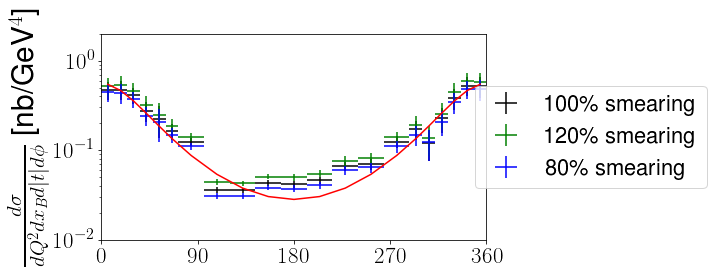

In [644]:
plt.rcParams["figure.figsize"] = (9, 4)
# plt.errorbar(phicenters, dvcsExpInb50nA1*invaccInb1/local.binVol/56.5/10**6, yerr = uncInb1, linestyle = '')
# plt.errorbar(phicenters, dvcsExpInb50nA2*invaccInb2/local.binVol/56.5/10**6, yerr = uncInb2, linestyle = '')
# plt.errorbar(phicenters, dvcsExpInb50nA3*invaccInb3/local.binVol/56.5/10**6, yerr = uncInb3, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA1*invaccOutb1/local.binVol/47.5/10**6, yerr = uncOutb1, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA2*invaccOutb2/local.binVol/47.5/10**6, yerr = uncOutb2, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA3*invaccOutb3/local.binVol/47.5/10**6, yerr = uncOutb3, linestyle = '')
plt.errorbar(phicenters, clasqaxsec_local/Frad2, xerr = (local.phi_f - local.phi_i)/2, yerr = clasqaxsec_local_unc, linestyle = '', color = 'k', label = '100\% smearing')
plt.errorbar(phicenters, clasqaxsec_local2/Frad2, xerr = (local.phi_f - local.phi_i)/2, yerr = clasqaxsec_local_unc2, linestyle = '', color = 'g', label = '120\% smearing')
plt.errorbar(phicenters, clasqaxsec_local3/Frad2, xerr = (local.phi_f - local.phi_i)/2, yerr = clasqaxsec_local_unc3, linestyle = '', color = 'b', label = '80\% smearing')
plt.plot(phicenters, BHarray, color = 'r')
plt.ylim([0.01, 2])
plt.yscale('log')
plt.xlim([0, 360])
plt.xticks([0, 90, 180, 270, 360])
plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")
plt.legend(loc = 'upper right', bbox_to_anchor = (1.6, 0.8))
plt.tight_layout()
plt.show()

In [624]:
(clasqaxsec_local2-clasqaxsec_local)/clasqaxsec_local/2

1281    0.049162
1282    0.060745
1283    0.061097
1284    0.081762
1285    0.047404
1286    0.073766
1287    0.074114
1288    0.115059
1289    0.097033
1290    0.089036
1291    0.099229
1292    0.097961
1293    0.076046
1294    0.078113
1295    0.062636
1296    0.057282
1297    0.062359
1298    0.064590
1299    0.076528
1300    0.067145
1301    0.053769
Name: binVol, dtype: float64

In [525]:
epgExpInb50nA1 = np.array(clasqaepgExpInb1)
pi0ExpInb50nA1 = local.loc[:, "pi0ExpInb1"]
dvcsSimInb50nA1 = local.loc[:, "39871"] + local.loc[:, "41241"] + local.loc[:, "41391"] + local.loc[:, "41811"] + local.loc[:, "41821"] + local.loc[:, "43971"]
bkg1gSimInb50nA1 = local.loc[:, "4076bkg_1g1"] + local.loc[:, "4202bkg_1g1"] + local.loc[:, "4209bkg_1g1"]
bkg2gSimInb50nA1 = local.loc[:, "4076bkg_2g1"] + local.loc[:, "4202bkg_2g1"] + local.loc[:, "4209bkg_2g1"]
contamination1 = np.where(np.isnan(pi0ExpInb50nA1/bkg2gSimInb50nA1*bkg1gSimInb50nA1), 0, pi0ExpInb50nA1/bkg2gSimInb50nA1*bkg1gSimInb50nA1)
dvcsExpInb50nA1 = np.where(epgExpInb50nA1 - contamination1>50, epgExpInb50nA1 - contamination1, 0)
invaccInb1 = np.where(dvcsSimInb50nA1>0, dvcsGenInb50nA/dvcsSimInb50nA1, 0)
accInb1 = dvcsSimInb50nA1/dvcsGenInb50nA
uncInb1 = np.sqrt(1/epgExpInb50nA1 + 1/pi0ExpInb50nA1 + 1/bkg2gSimInb50nA1 + 1/bkg1gSimInb50nA1 + (1-accInb1)/accInb1/dvcsGenInb50nA)
uncInb1 = np.where(uncInb1==np.inf, 0, uncInb1)

epgExpInb50nA2 = np.array(clasqaepgExpInb2)
pi0ExpInb50nA2 = local.loc[:, "pi0ExpInb2"]
dvcsSimInb50nA2 = local.loc[:, "39872"] + local.loc[:, "41242"] + local.loc[:, "41392"] + local.loc[:, "41812"] + local.loc[:, "41822"] + local.loc[:, "43972"]
bkg1gSimInb50nA2 = local.loc[:, "4076bkg_1g2"] + local.loc[:, "4202bkg_1g2"] + local.loc[:, "4209bkg_1g2"]
bkg2gSimInb50nA2 = local.loc[:, "4076bkg_2g2"] + local.loc[:, "4202bkg_2g2"] + local.loc[:, "4209bkg_2g2"]
contamination2 = np.where(np.isnan(pi0ExpInb50nA2/bkg2gSimInb50nA2*bkg1gSimInb50nA2), 0, pi0ExpInb50nA2/bkg2gSimInb50nA2*bkg1gSimInb50nA2)
dvcsExpInb50nA2 = np.where(epgExpInb50nA2 - contamination2>50, epgExpInb50nA2 - contamination2, 0)
invaccInb2 = np.where(dvcsSimInb50nA2>0, dvcsGenInb50nA/dvcsSimInb50nA2, 0)
accInb2 = dvcsSimInb50nA2/dvcsGenInb50nA
uncInb2 = np.sqrt(1/epgExpInb50nA2 + 1/pi0ExpInb50nA2 + 1/bkg2gSimInb50nA2 + 1/bkg1gSimInb50nA2 + (1-accInb2)/accInb2/dvcsGenInb50nA)
uncInb2 = np.where(uncInb2==np.inf, 0, uncInb2)

epgExpInb50nA3 = np.array(clasqaepgExpInb3)
pi0ExpInb50nA3 = local.loc[:, "pi0ExpInb3"]
dvcsSimInb50nA3 = local.loc[:, "39873"] + local.loc[:, "41243"] + local.loc[:, "41393"] + local.loc[:, "41813"] + local.loc[:, "41823"] + local.loc[:, "43973"]
bkg1gSimInb50nA3 = local.loc[:, "4076bkg_1g3"] + local.loc[:, "4202bkg_1g3"] + local.loc[:, "4209bkg_1g3"]
bkg2gSimInb50nA3 = local.loc[:, "4076bkg_2g3"] + local.loc[:, "4202bkg_2g3"] + local.loc[:, "4209bkg_2g3"]
contamination3 = np.where(np.isnan(pi0ExpInb50nA3/bkg2gSimInb50nA3*bkg1gSimInb50nA3), 0, pi0ExpInb50nA3/bkg2gSimInb50nA3*bkg1gSimInb50nA3)
dvcsExpInb50nA3 = np.where(epgExpInb50nA3 - contamination3>50, epgExpInb50nA3 - contamination3, 0)
invaccInb3 = np.where(dvcsSimInb50nA3>0, dvcsGenInb50nA/dvcsSimInb50nA3, 0)
accInb3 = dvcsSimInb50nA3/dvcsGenInb50nA
uncInb3 = np.sqrt(1/epgExpInb50nA3 + 1/pi0ExpInb50nA3 + 1/bkg2gSimInb50nA3 + 1/bkg1gSimInb50nA3 + (1-accInb3)/accInb3/dvcsGenInb50nA)
uncInb3 = np.where(uncInb3==np.inf, 0, uncInb3)

epgExpOutb50nA1 = np.array(clasqaepgExpOutb1)
pi0ExpOutb50nA1 = local.loc[:, "pi0ExpOutb1"]
dvcsSimOutb50nA1 = local.loc[:, "42401"] + local.loc[:, "42501"] + local.loc[:, "42511"] + local.loc[:, "42521"] + local.loc[:, "42551"] + local.loc[:, "43981"]
bkg1gSimOutb50nA1 = local.loc[:, "4243bkg_1g1"] + local.loc[:, "4271bkg_1g1"] + local.loc[:, "4290bkg_1g1"]
bkg2gSimOutb50nA1 = local.loc[:, "4243bkg_2g1"] + local.loc[:, "4271bkg_2g1"] + local.loc[:, "4290bkg_2g1"]
contamination1 = np.where(np.isnan(pi0ExpOutb50nA1/bkg2gSimOutb50nA1*bkg1gSimOutb50nA1), 0, pi0ExpOutb50nA1/bkg2gSimOutb50nA1*bkg1gSimOutb50nA1)
dvcsExpOutb50nA1 = np.where(epgExpOutb50nA1 - contamination1>50, epgExpOutb50nA1 - contamination1, 0)
invaccOutb1 = np.where(dvcsSimOutb50nA1>0, dvcsGenOutb50nA/dvcsSimOutb50nA1, 0)
accOutb1 = dvcsSimOutb50nA1/dvcsGenOutb50nA
uncOutb1 = np.sqrt(1/epgExpOutb50nA1 + 1/pi0ExpOutb50nA1 + 1/bkg2gSimOutb50nA1 + 1/bkg1gSimOutb50nA1 + (1-accOutb1)/accOutb1/dvcsGenOutb50nA)
uncOutb1 = np.where(uncOutb1==np.inf, 0, uncOutb1)

epgExpOutb50nA2 = np.array(clasqaepgExpOutb2)
pi0ExpOutb50nA2 = local.loc[:, "pi0ExpOutb2"]
dvcsSimOutb50nA2 = local.loc[:, "42402"] + local.loc[:, "42502"] + local.loc[:, "42512"] + local.loc[:, "42522"] + local.loc[:, "42552"] + local.loc[:, "43982"]
bkg1gSimOutb50nA2 = local.loc[:, "4243bkg_1g2"] + local.loc[:, "4271bkg_1g2"] + local.loc[:, "4290bkg_1g2"]
bkg2gSimOutb50nA2 = local.loc[:, "4243bkg_2g2"] + local.loc[:, "4271bkg_2g2"] + local.loc[:, "4290bkg_2g2"]
contamination2 = np.where(np.isnan(pi0ExpOutb50nA2/bkg2gSimOutb50nA2*bkg1gSimOutb50nA2), 0, pi0ExpOutb50nA2/bkg2gSimOutb50nA2*bkg1gSimOutb50nA2)
dvcsExpOutb50nA2 = np.where(epgExpOutb50nA2 - contamination2>50, epgExpOutb50nA2 - contamination2, 0)
invaccOutb2 = np.where(dvcsSimOutb50nA2>0, dvcsGenOutb50nA/dvcsSimOutb50nA2, 0)
accOutb2 = dvcsSimOutb50nA2/dvcsGenOutb50nA
uncOutb2 = np.sqrt(1/epgExpOutb50nA2 + 1/pi0ExpOutb50nA2 + 1/bkg2gSimOutb50nA2 + 1/bkg1gSimOutb50nA2 + (1-accOutb2)/accOutb2/dvcsGenOutb50nA)
uncOutb2 = np.where(uncOutb2==np.inf, 0, uncOutb2)

epgExpOutb50nA3 = np.array(clasqaepgExpOutb3)
pi0ExpOutb50nA3 = local.loc[:, "pi0ExpOutb3"]
dvcsSimOutb50nA3 = local.loc[:, "42403"] + local.loc[:, "42503"] + local.loc[:, "42513"] + local.loc[:, "42523"] + local.loc[:, "42553"] + local.loc[:, "43983"]
bkg1gSimOutb50nA3 = local.loc[:, "4243bkg_1g3"] + local.loc[:, "4271bkg_1g3"] + local.loc[:, "4290bkg_1g3"]
bkg2gSimOutb50nA3 = local.loc[:, "4243bkg_2g3"] + local.loc[:, "4271bkg_2g3"] + local.loc[:, "4290bkg_2g3"]
contamination3 = np.where(np.isnan(pi0ExpOutb50nA3/bkg2gSimOutb50nA3*bkg1gSimOutb50nA3), 0, pi0ExpOutb50nA3/bkg2gSimOutb50nA3*bkg1gSimOutb50nA3)
dvcsExpOutb50nA3 = np.where(epgExpOutb50nA3 - contamination3>50, epgExpOutb50nA3 - contamination3, 0)
invaccOutb3 = np.where(dvcsSimOutb50nA3>0, dvcsGenOutb50nA/dvcsSimOutb50nA3, 0)
accOutb3 = dvcsSimOutb50nA3/dvcsGenOutb50nA
uncOutb3 = np.sqrt(1/epgExpOutb50nA3 + 1/pi0ExpOutb50nA3 + 1/bkg2gSimOutb50nA3 + 1/bkg1gSimOutb50nA3 + (1-accOutb3)/accOutb3/dvcsGenOutb50nA)
uncOutb3 = np.where(uncOutb3==np.inf, 0, uncOutb3)

uncInb1 = uncInb1*dvcsExpInb50nA1*invaccInb1/local.binVol/clasqachargeInb/10**6
uncInb2 = uncInb2*dvcsExpInb50nA2*invaccInb2/local.binVol/clasqachargeInb/10**6
uncInb3 = uncInb3*dvcsExpInb50nA3*invaccInb3/local.binVol/clasqachargeInb/10**6
uncOutb1 = uncOutb1*dvcsExpOutb50nA1*invaccOutb1/local.binVol/clasqachargeOutb/10**6
uncOutb2 = uncOutb2*dvcsExpOutb50nA2*invaccOutb2/local.binVol/clasqachargeOutb/10**6
uncOutb3 = uncOutb3*dvcsExpOutb50nA3*invaccOutb3/local.binVol/clasqachargeOutb/10**6

weightInb1 = np.where(1/uncInb1**2==np.inf, 0, 1/uncInb1**2)
weightInb2 = np.where(1/uncInb2**2==np.inf, 0, 1/uncInb2**2)
weightInb3 = np.where(1/uncInb3**2==np.inf, 0, 1/uncInb3**2)
weightOutb1 = np.where(1/uncOutb1**2==np.inf, 0, 1/uncOutb1**2)
weightOutb2 = np.where(1/uncOutb2**2==np.inf, 0, 1/uncOutb2**2)
weightOutb3 = np.where(1/uncOutb3**2==np.inf, 0, 1/uncOutb3**2)

clasqaxsec_local = (dvcsExpInb50nA1*invaccInb1/local.binVol/56.5/10**6*weightInb1 + dvcsExpInb50nA2*invaccInb2/local.binVol/56.5/10**6*weightInb2 + dvcsExpInb50nA3*invaccInb3/local.binVol/56.5/10**6*weightInb3 + dvcsExpOutb50nA1*invaccOutb1/local.binVol/47.5/10**6*weightOutb1 + dvcsExpOutb50nA2*invaccOutb2/local.binVol/47.5/10**6*weightOutb2 + dvcsExpOutb50nA3*invaccOutb3/local.binVol/47.5/10**6*weightOutb3)/(weightInb1 + weightInb2 + weightInb3 + weightOutb1 + weightOutb2 + weightOutb3)
clasqaxsec_local_unc = np.sqrt(1/(weightInb1 + weightInb2 + weightInb3 + weightOutb1 + weightOutb2 + weightOutb3))

<ipython-input-525-f15bbc32ca44>:10: RuntimeWarning: divide by zero encountered in true_divide
  uncInb1 = np.sqrt(1/epgExpInb50nA1 + 1/pi0ExpInb50nA1 + 1/bkg2gSimInb50nA1 + 1/bkg1gSimInb50nA1 + (1-accInb1)/accInb1/dvcsGenInb50nA)
<ipython-input-525-f15bbc32ca44>:22: RuntimeWarning: divide by zero encountered in true_divide
  uncInb2 = np.sqrt(1/epgExpInb50nA2 + 1/pi0ExpInb50nA2 + 1/bkg2gSimInb50nA2 + 1/bkg1gSimInb50nA2 + (1-accInb2)/accInb2/dvcsGenInb50nA)
<ipython-input-525-f15bbc32ca44>:34: RuntimeWarning: divide by zero encountered in true_divide
  uncInb3 = np.sqrt(1/epgExpInb50nA3 + 1/pi0ExpInb50nA3 + 1/bkg2gSimInb50nA3 + 1/bkg1gSimInb50nA3 + (1-accInb3)/accInb3/dvcsGenInb50nA)
<ipython-input-525-f15bbc32ca44>:46: RuntimeWarning: divide by zero encountered in true_divide
  uncOutb1 = np.sqrt(1/epgExpOutb50nA1 + 1/pi0ExpOutb50nA1 + 1/bkg2gSimOutb50nA1 + 1/bkg1gSimOutb50nA1 + (1-accOutb1)/accOutb1/dvcsGenOutb50nA)
<ipython-input-525-f15bbc32ca44>:70: RuntimeWarning: divide by zero 

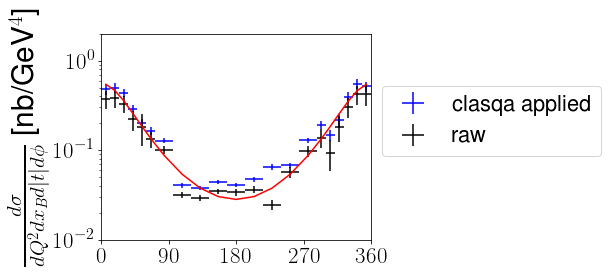

In [582]:
plt.rcParams["figure.figsize"] = (9, 4)
# plt.errorbar(phicenters, dvcsExpInb50nA1*invaccInb1/local.binVol/56.5/10**6, yerr = uncInb1, linestyle = '')
# plt.errorbar(phicenters, dvcsExpInb50nA2*invaccInb2/local.binVol/56.5/10**6, yerr = uncInb2, linestyle = '')
# plt.errorbar(phicenters, dvcsExpInb50nA3*invaccInb3/local.binVol/56.5/10**6, yerr = uncInb3, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA1*invaccOutb1/local.binVol/47.5/10**6, yerr = uncOutb1, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA2*invaccOutb2/local.binVol/47.5/10**6, yerr = uncOutb2, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA3*invaccOutb3/local.binVol/47.5/10**6, yerr = uncOutb3, linestyle = '')
plt.errorbar(phicenters, clasqaxsec_local/Frad2, xerr = (local.phi_f - local.phi_i)/2, yerr = clasqaxsec_local_unc, linestyle = '', color = 'b', label = 'clasqa applied')
plt.errorbar(phicenters, xsec_local/Frad2, xerr = (local.phi_f - local.phi_i)/2, yerr = xsec_local_unc, linestyle = '', color = 'k', label = 'raw')
plt.plot(phicenters, BHarray, color = 'r')
plt.ylim([0.01, 2])
plt.yscale('log')
plt.xlim([0, 360])
plt.xticks([0, 90, 180, 270, 360])
plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")
plt.legend(bbox_to_anchor = (1, 0.8))

plt.show()

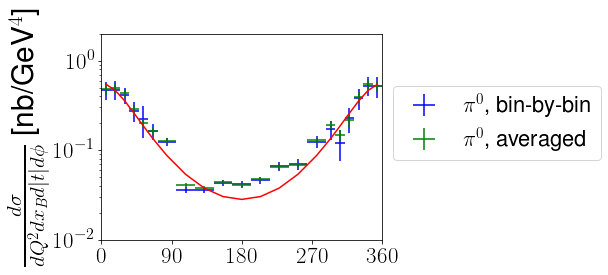

In [594]:
plt.rcParams["figure.figsize"] = (9, 4)
# plt.errorbar(phicenters, dvcsExpInb50nA1*invaccInb1/local.binVol/56.5/10**6, yerr = uncInb1, linestyle = '')
# plt.errorbar(phicenters, dvcsExpInb50nA2*invaccInb2/local.binVol/56.5/10**6, yerr = uncInb2, linestyle = '')
# plt.errorbar(phicenters, dvcsExpInb50nA3*invaccInb3/local.binVol/56.5/10**6, yerr = uncInb3, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA1*invaccOutb1/local.binVol/47.5/10**6, yerr = uncOutb1, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA2*invaccOutb2/local.binVol/47.5/10**6, yerr = uncOutb2, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA3*invaccOutb3/local.binVol/47.5/10**6, yerr = uncOutb3, linestyle = '')
plt.errorbar(phicenters, clasqaxsec_local/Frad2, xerr = (local.phi_f - local.phi_i)/2, yerr = clasqaxsec_local_unc, linestyle = '', color = 'b', label = r'$\pi^0$'+', bin-by-bin')
plt.errorbar(phicenters, clasqaxsec_local2/Frad2, xerr = (local.phi_f - local.phi_i)/2, yerr = clasqaxsec_local_unc2, linestyle = '', color = 'g', label = r'$\pi^0$'+', averaged')
plt.plot(phicenters, BHarray, color = 'r')
plt.ylim([0.01, 2])
plt.yscale('log')
plt.xlim([0, 360])
plt.xticks([0, 90, 180, 270, 360])
plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")
plt.legend(bbox_to_anchor = (1, 0.8))

plt.show()

In [524]:
clasqaxsec_local -xsec_local

1281   -0.016966
1282   -0.025038
1283   -0.016690
1284   -0.012922
1285   -0.010390
1286   -0.007293
1287   -0.006329
1288   -0.003606
1289   -0.002043
1290   -0.002062
1291   -0.002300
1292   -0.001588
1293    0.021806
1294   -0.003433
1295   -0.003845
1296   -0.007126
1297   -0.001954
1298   -0.010931
1299   -0.014662
1300   -0.020274
1301   -0.029107
Name: binVol, dtype: float64

In [520]:
xsec_local

1281    0.336989
1282    0.347806
1283    0.298175
1284    0.199163
1285    0.163243
1286    0.117649
1287    0.088658
1288    0.027364
1289    0.025175
1290    0.029839
1291    0.029144
1292    0.031233
1293    0.021190
1294    0.049544
1295    0.086856
1296    0.123205
1297    0.083749
1298    0.164449
1299    0.275922
1300    0.380138
1301    0.384001
Name: binVol, dtype: float64

In [309]:
dvcsExpInb50nA1*invaccInb1/local.binVol/56.5/10**6/

array([  1.        ,   0.        ,   0.        ,   0.71428571,
         0.75      ,   3.26315789,  44.51835853, 152.7023622 ,
       185.66877516, 298.26875   , 195.45714286, 167.55759429,
        55.49246231,  77.75965665, 223.08536585, 134.05555556,
       132.        ,  24.        ,   0.        ,   0.        ,
         0.        ])

In [389]:
weightInb1 = np.where(1/uncInb1**2==np.inf, 0, 1/uncInb1**2)
weightInb2 = np.where(1/uncInb2**2==np.inf, 0, 1/uncInb2**2)
weightInb3 = np.where(1/uncInb3**2==np.inf, 0, 1/uncInb3**2)
weightOutb1 = np.where(1/uncOutb1**2==np.inf, 0, 1/uncOutb1**2)
weightOutb2 = np.where(1/uncOutb2**2==np.inf, 0, 1/uncOutb2**2)
weightOutb3 = np.where(1/uncOutb3**2==np.inf, 0, 1/uncOutb3**2)


In [401]:
xsec_local = (dvcsExpInb50nA1*invaccInb1/local.binVol/56.5/10**6*weightInb1 + dvcsExpInb50nA2*invaccInb2/local.binVol/56.5/10**6*weightInb2 + dvcsExpInb50nA3*invaccInb3/local.binVol/56.5/10**6*weightInb3 + dvcsExpOutb50nA1*invaccOutb1/local.binVol/47.5/10**6*weightOutb1 + dvcsExpOutb50nA2*invaccOutb2/local.binVol/47.5/10**6*weightOutb2 + dvcsExpOutb50nA3*invaccOutb3/local.binVol/47.5/10**6*weightOutb3)/(weightInb1 + weightInb2 + weightInb3 + weightOutb1 + weightOutb2 + weightOutb3)

In [402]:
xsec_local_unc = np.sqrt(1/(weightInb1 + weightInb2 + weightInb3 + weightOutb1 + weightOutb2 + weightOutb3))

In [416]:
import subprocess

In [411]:
def printBH(xB, Q2, t, phi):
    dstot = subprocess.check_output(['/Users/sangbaek/CLAS12/dvcs/print/dvcsgen', '--beam', '10.604', '--x', str(xB), str(xB), '--q2', str(Q2), str(Q2),'--t', str(t), str(t), '--bh', '1', '--phi', str(phi)])
    dstot = float(dstot.splitlines()[0].decode("utf-8"))
    return dstot

In [412]:
def printBHarray(xBarray, Q2array, tarray, phiarray):
    BHarray = []
    if isinstance(xBarray, pd.core.series.Series):
        xBarray = xBarray.to_numpy()
        Q2array = Q2array.to_numpy()
        tarray = tarray.to_numpy()
        phiarray = phiarray.to_numpy()
        
    for xB, Q2, t, phi in zip(xBarray, Q2array, tarray, phiarray):
        BHarray.append(printBH(xB, Q2, t, phi))
    return BHarray

In [424]:
BHarray = printBHarray((local.xB_i +local.xB_f)/2, (local.Q2_i +local.Q2_f)/2, (local.t_i +local.t_f)/2, np.radians((local.phi_i +local.phi_f)/2))

In [530]:
for i in range(21):
    xBmean = (local.xB_i+local.xB_f).to_numpy()[i]
    Q2mean = (local.Q2_i+local.Q2_f).to_numpy()[i]
    tmean = (local.t_i+local.t_f).to_numpy()[i]
    phimean = np.radians((local.phi_i+local.phi_f).to_numpy()[i]/2)
    print("./dvcsgen --x "+str(xBmean) + "  " + str(xBmean) +"  --q2 " +str(Q2mean) + "\t" + str(Q2mean) +  "  --t "+str(tmean) + "\t" + str(tmean) + "  --bh 3 --gpd 101 --vv2cut 0.15 --delta 0.1 --printrad --phi " + str(phimean) +"| grep Frad_with_error \n")

./dvcsgen --x 0.35954814529756174  0.35954814529756174  --q2 4.421690351495242	4.421690351495242  --t 0.498	0.498  --bh 3 --gpd 101 --vv2cut 0.15 --delta 0.1 --printrad --phi 0.10471975511965978| grep Frad_with_error 

./dvcsgen --x 0.35954814529756174  0.35954814529756174  --q2 4.421690351495242	4.421690351495242  --t 0.498	0.498  --bh 3 --gpd 101 --vv2cut 0.15 --delta 0.1 --printrad --phi 0.3141592653589793| grep Frad_with_error 

./dvcsgen --x 0.35954814529756174  0.35954814529756174  --q2 4.421690351495242	4.421690351495242  --t 0.498	0.498  --bh 3 --gpd 101 --vv2cut 0.15 --delta 0.1 --printrad --phi 0.5235987755982988| grep Frad_with_error 

./dvcsgen --x 0.35954814529756174  0.35954814529756174  --q2 4.421690351495242	4.421690351495242  --t 0.498	0.498  --bh 3 --gpd 101 --vv2cut 0.15 --delta 0.1 --printrad --phi 0.7330382858376184| grep Frad_with_error 

./dvcsgen --x 0.35954814529756174  0.35954814529756174  --q2 4.421690351495242	4.421690351495242  --t 0.498	0.498  --bh 3 --gpd

In [428]:
len((local.xB_i+local.xB_f).to_numpy())

21

In [433]:
Frad = np.array([0.93420515563788342,0.93493088155241089,0.93597022355991688,0.93586782581451267,0.93426429436755887,0.93134144690742526,0.92543323864092497,0.91728499520633600,0.91058911829070832,0.90616308091335618,0.90486014683563021,0.90637075076769069,0.91055807152983081,0.91719703596004853,0.92558085383481414,0.93115287807435143,0.93426500988888184,0.93596254906272047,0.93607579656966200,0.93513613391204986,0.93399567430605424])

In [439]:
contamination2

array([ 0.        ,  1.77777778,  7.68292683,  7.54032258,  4.17777778,
       13.1598513 , 48.63432836, 46.28432432, 46.50694777, 37.68577681,
       18.44444444, 22.07936508, 22.03110273, 18.7958884 , 18.11320755,
       14.27586207,  4.44444444,  2.66666667,  3.        ,  0.        ,
        2.375     ])

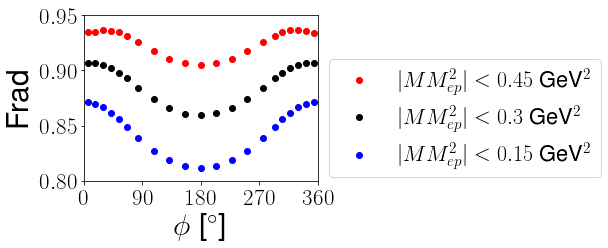

In [546]:
plt.rcParams["figure.figsize"] = (9, 4)
plt.scatter(phicenters, Frad, color = 'r', label = r"$|MM^2_{ep}|<0.45$" + " GeV"+r"$^2$")
plt.scatter(phicenters, Frad2, color = 'k', label = r"$|MM^2_{ep}|<0.3$" + " GeV"+r"$^2$")
plt.scatter(phicenters, Fradv15, color = 'b', label = r"$|MM^2_{ep}|<0.15$" + " GeV"+r"$^2$")
plt.xlabel(r"$\phi$" +" ["+degree+"]")
plt.ylabel("Frad")
plt.xlim([0, 360])
plt.xticks([0, 90, 180, 270, 360])
plt.ylim([0.8, 0.95])
plt.legend(bbox_to_anchor = (1, 0.8))
plt.show()

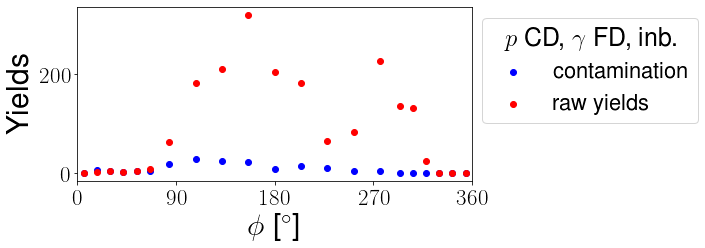

In [476]:
plt.rcParams["figure.figsize"] = (9, 4)
plt.scatter(phicenters, contamination2, color = 'b', label = 'contamination')
plt.scatter(phicenters, epgExpInb50nA2, color = 'r', label = 'raw yields')
plt.xlabel(r"$\phi$" +" ["+degree+"]")
plt.ylabel("Yields")
plt.xticks([0, 90, 180, 270, 360])
plt.xlim([0, 360])
plt.legend(title = r"$p$"+" CD, "+r"$\gamma$"+" FD,"+" inb.", loc = 'upper right',bbox_to_anchor = (1.6, 1))
plt.tight_layout()
plt.show()

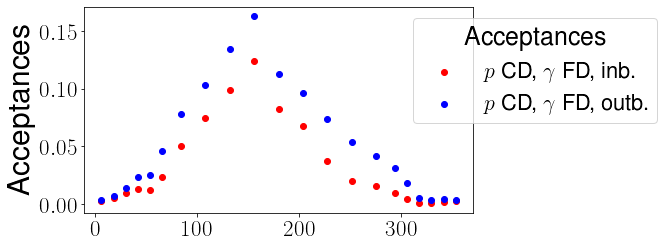

In [485]:
plt.rcParams["figure.figsize"] = (9, 4)
plt.scatter(phicenters, accInb2, color = 'r', label = r"$p$"+" CD, "+r"$\gamma$"+" FD,"+" inb.")
plt.scatter(phicenters, accOutb2, color = 'b', label = r"$p$"+" CD, "+r"$\gamma$"+" FD,"+" outb.")
# plt.scatter(phicenters, epgExpInb50nA2, color = 'r', label = 'raw yields')
# plt.xlabel(r"$\phi$" +" ["+degree+"]")
plt.ylabel("Acceptances")
# plt.xticks([0, 90, 180, 270, 360])
# plt.xlim([0, 360])
plt.legend(title = "Acceptances", loc = 'upper right',bbox_to_anchor = (1.5, 1))
plt.tight_layout()
plt.show()

In [488]:
Frad2 = [0.90683802079894149, 0.90631010974664883, 0.90482124967691846, 0.90205034281383811, 0.89772985935427296, 0.89270338698926255, 0.88429233235016436, 0.87403838384362209, 0.86588505260697535, 0.86091955993367975, 0.85923775697676386, 0.86097884900435684, 0.86597064761634324, 0.87396722976981989, 0.88443536673653156, 0.89272161843704689, 0.89782560409911161, 0.90205270619017786, 0.90500262237383489, 0.90636338833077001, 0.90686910219909089]

In [501]:
local.Q2xBtphi.to_numpy()

array([1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291,
       1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301])

In [503]:
clasqaepgExpInb1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
clasqaepgExpInb2 = [1, 2, 4, 3, 5, 8, 58, 160, 194, 298, 188, 172, 58, 77, 213, 128, 124, 22, 0, 0, 0]
clasqaepgExpInb3 = [456, 628, 760, 329, 74, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 51, 279, 798, 820, 491]
clasqachargeInb = 42.3
clasqaepgExpOutb1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
clasqaepgExpOutb2 = [61, 128, 195, 208, 166, 225, 582, 512, 575, 593, 348, 378, 287, 245, 288, 162, 108, 29, 37, 76, 86]
clasqaepgExpOutb3 = [594, 566, 515, 245, 81, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 72, 285, 521, 611, 564]
clasqachargeOutb = 35.84

In [533]:
local.phi_i

1281      0
1282     12
1283     24
1284     36
1285     48
1286     60
1287     72
1288     96
1289    120
1290    144
1291    168
1292    192
1293    216
1294    240
1295    264
1296    288
1297    300
1298    312
1299    324
1300    336
1301    348
Name: phi_i, dtype: int64

In [534]:
Fradv15 = [0.87165997587118849, 0.86997218679286981, 0.86662397253246559, 0.86173213974054697, 0.85569177869756474, 0.84899999960168848, 0.83908438114391115, 0.82739614326831235, 0.81856434499839736, 0.81322345163113074, 0.81143982022096539, 0.81325552870644735, 0.81865862300270464, 0.82746964610650031, 0.83911049821512018, 0.84904541526173760, 0.85572055016003112, 0.86165447238627990, 0.86659986768500041, 0.86990555384322732, 0.87178847418208139]

In [587]:
np.mean(Frad/Frad2)

1.0423022617276976

In [589]:
np.mean(np.array(Fradv15)/Frad2)

0.9519900077733746

In [606]:
np.abs((clasqaxsec_local-clasqaxsec_local2)/clasqaxsec_local).mean()

0.05406107719385679

In [630]:
np.sqrt(5**2+4**2+5**2+5**2)

9.539392014169456

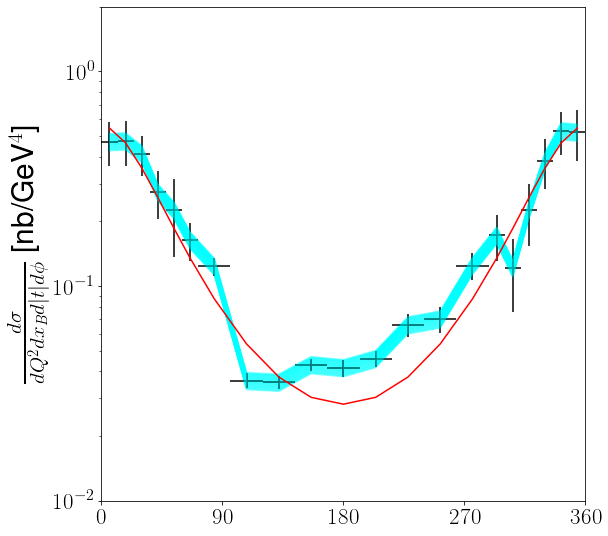

In [631]:
plt.rcParams["figure.figsize"] = (9, 8)
# plt.errorbar(phicenters, dvcsExpInb50nA1*invaccInb1/local.binVol/56.5/10**6, yerr = uncInb1, linestyle = '')
# plt.errorbar(phicenters, dvcsExpInb50nA2*invaccInb2/local.binVol/56.5/10**6, yerr = uncInb2, linestyle = '')
# plt.errorbar(phicenters, dvcsExpInb50nA3*invaccInb3/local.binVol/56.5/10**6, yerr = uncInb3, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA1*invaccOutb1/local.binVol/47.5/10**6, yerr = uncOutb1, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA2*invaccOutb2/local.binVol/47.5/10**6, yerr = uncOutb2, linestyle = '')
# plt.errorbar(phicenters, dvcsExpOutb50nA3*invaccOutb3/local.binVol/47.5/10**6, yerr = uncOutb3, linestyle = '')

for n in np.linspace(1-0.095, 1+0.095, 1001):
    plt.plot(phicenters, n*clasqaxsec_local/Frad2, color = 'cyan', alpha = 0.01)

plt.errorbar(phicenters, clasqaxsec_local/Frad2, xerr = (local.phi_f - local.phi_i)/2, yerr = clasqaxsec_local_unc, linestyle = '', color = 'k')
plt.plot(phicenters, BHarray, color = 'r')
plt.ylim([0.01, 2])
plt.yscale('log')
plt.xlim([0, 360])
plt.xticks([0, 90, 180, 270, 360])
plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")

plt.show()

In [651]:
bkgSimInb.Gent = 2*M*(np.sqrt(M**2+bkgSimInb.GenPp**2)-M)

<ipython-input-651-9d78e0a318ba>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  bkgSimInb.Gent = 2*M*(np.sqrt(M**2+bkgSimInb.GenPp**2)-M)


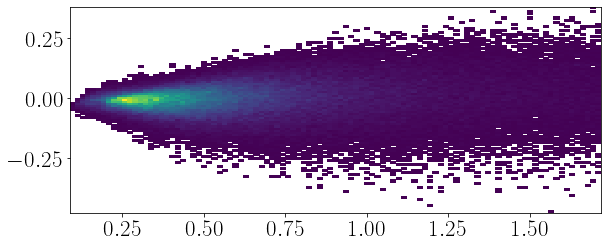

In [657]:
plt.hist2d(bkgSimInb.t1, bkgSimInb.t1-bkgSimInb.Gent, bins = 101, cmin =1)
plt.show()

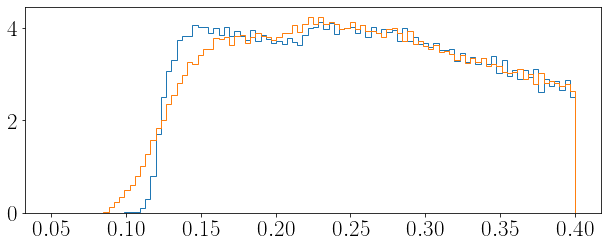

In [683]:
bins = np.linspace(0.05, 0.4, 101)
# plt.hist(bkgSimInb.t1, bins = bins, density = True, histtype = 'step')
# plt.hist(bkgSimInb.Gent, bins = bins, density = True, histtype = 'step')
plt.hist(dvcsSimInb.Gent2, bins = bins, density = True, histtype = 'step')
plt.hist(dvcsSimInb.t1, bins = bins, density = True, histtype = 'step')
plt.show()

In [ ]:
plt.hist2d(dvcsSimInb.t2, dvcsSimInb.t2-bkgSimInb.Gent, bins = 101, cmin =1)
plt.show()

In [687]:
dvcsSimInb.t1.min()

0.08788279779588642

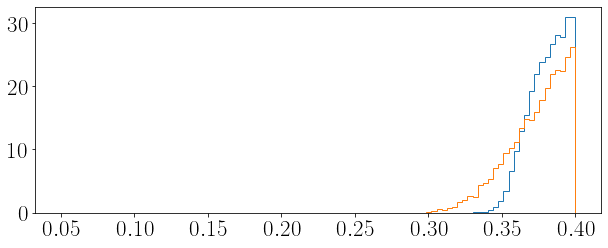

In [691]:
plt.hist(dvcsSimInbCD.GenPp, bins = bins, density = True, histtype = 'step')
plt.hist(dvcsSimInbCD.Pp, bins = bins, density = True, histtype = 'step')
plt.show()